# Анализ пользовательского поведения и популярности событий на Яндекс Афише осенью 2024 года

***Автор: Сайковская Милена***

### Цель проекта  
Цель данного проекта - провести исследовательский анализ данных сервиса бронирования билетов Яндекс Афиши за период с 1 июня по 30 ноября 2024 года, чтобы выяснить причины изменений в пользовательском cпросе, определить ключевые факторы, влияющие на популярность мероприятий, и проанализировать активность пользователей, как с мобильных, так и с десктопных устройств. В результате анализа будет произведено сравнение сезонных изменений, выделение лидеров по выручке, а также определены особенности поведения пользователей в зависимости от различных факторов, таких как тип мероприятия, устройство, возрастное ограничение и прочее.

### Задачи проекта
1. **Загрузить и подготовить данные**: Анализ и подготовка данных для дальнейшего исследования, включая проверку на пропуски, дубликаты, преобразование валют и создание новых столбцов, таких как выручка в рублях, выручка с одного билета и информация о сезонности.
2. **Провести Исследовательский анализ данных**: Изучение распределения заказов по различным сегментам (тип мероприятия, тип устройства, категория по возрастному рейтингу) и анализ их сезонных изменений. Включает расчет средней выручки с одного билета, а также сравнение летнего и осеннего периодов.
3. **Проанализировать активность пользователей осенью 2024 года**: Анализ динамики заказов, количества активных пользователей (DAU), средней активности пользователей и выявление недельной цикличности.
4. **Исследовать популярность событий и партнеров осенью 2024 года**: Определение наиболее популярных мероприятий, анализ выручки по регионам и партнерам, а также выявление лидеров по количеству мероприятий и заказов.
5. **Проверить гипотезы**: Статистический анализ для проверки гипотез о более высокой активности пользователей мобильных приложений по сравнению с десктопными, включая использование соответствующих статистических тестов.
6. **Сформулировать общий вывод и рекомендации**: Описание основных результатов исследования, анализ трендов, выявление лидеров среди регионов и партнеров, а также предложения по улучшению пользовательского опыта и предложения по дальнейшему развитию сервиса.

### Описание данных
В проекте используются данные Яндекс Афиши за период с 1 июня по 30 ноября 2024 года, включающие:  
Первый датасет `final_tickets_orders_df.csv` включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных: 
- `order_id` — уникальный идентификатор заказа. 
- `user_id` — уникальный идентификатор пользователя. 
- `created_dt_msk` — дата создания заказа (московское время). 
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events. 
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'. 
- `age_limit` — возрастное ограничение мероприятия. 
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора. 
- `tickets_count` — количество купленных билетов. 
- `total` — общая сумма заказа. 
- `days_since_prev`  - количество дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.


 Второй датасет `final_tickets_events_df` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Датасет содержит такие поля:
- `event_id` — уникальный идентификатор мероприятия. 
- `event_name` — название мероприятия (аналог поля event_name_code из исходной базы данных.)
- `event_type_description` — описание типа мероприятия. 
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее. 
- `organizers` — организаторы мероприятия. 
- `region_name` — название региона.
- ` city_name` — название города. 
- `venue_id` — уникальный идентификатор площадки. 
- `venue_name` — название площадки. 
- `venue_address` — адрес площадки. 


Анализ данных в предыдущей части проекта показал, что выручка от заказов представлена в двух валютах — российских рублях и казахстанских тенге. Для удобства решения было бы корректно привести данные к одной валюте, например к российским рублям. Для этого в распоряжении есть датасет `final_tickets_tenge_df.csv` с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге (используем эти данные для конвертации валюты.) Датасет содержит такие поля: 
- `nominal` — номинал (100 тенге). 
- `data` — дата.
- `curs` — курс тенге к рублю. 
- `cdx` — обозначение валюты (kzt).


### Структура проекта  
1. Введение  
   - Описание проекта  
   - Цели и задачи  
   - Описание данных  


2. Загрузка и предобработка данных  
   - Импорт данных  
   - Проверка на пропуски и дубликаты  
   - Преобразование типов данных  
   - Создание новых признаков  


3. Исследовательский анализ данных (EDA)  
   - 3.1. Анализ распределения заказов по сегментам и их сезонные изменения  
     - Динамика количества заказов по месяцам  
     - Изменение средней стоимости заказов  
   - 3.2. Осенняя активность пользователей  
     - Сравнение активности до и в начале осени  
     - Анализ категорий событий, пользующихся спросом  
   - 3.3. Популярные события и партнёры  
     - ТОП событий по количеству заказов  
     - Рейтинг партнёров по выручке  


4. Статистический анализ данных  
   - Проверка гипотез о различиях в поведении пользователей с мобильных и стационарных устройств
   

5. Выводы и рекомендации  
   - Основные инсайты  
   - Предложения для продуктовой команды


### Гипотезы для проверки  
1. Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.  
2. Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.


### Инструменты  
- `Python` (`Pandas`, `NumPy`, `Matplotlib`, `Seaborn`, `SciPy`).  
- `Jupyter Notebook`.  
- Статистические тесты (`t-тест`, `U-критерий Манна-Уитни`).  

---

In [1]:
# Сначала установим все необходимые библиотеки
!pip install seaborn scipy pandas matplotlib requests

# Затем импортируем их
import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy import stats

# Проверка импортов
print("Все библиотеки успешно импортированы!")

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
# from phik import phik_matrix

Все библиотеки успешно импортированы!


In [2]:
# Создаем функцию для загурзки данных
def load_data_from_url(url):
    """Загружает данные по URL с проверкой доступности"""
    try:
        response = requests.get(url)
        if response.status_code == 200:
            return pd.read_csv(url)
        else:
            print(f"Ошибка при загрузке данных: HTTP статус {response.status_code}")
            return None
    except Exception as e:
        print(f"Произошла ошибка при загрузке данных: {str(e)}")
        return None

# Список URL для загрузки данных
data_urls = {
    'orders': 'https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv',
    'events': 'https://code.s3.yandex.net/datasets/final_tickets_events_df.csv',
    'tenge': 'https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'
}

# Загружаем данные с проверкой
df_orders = load_data_from_url(data_urls['orders'])
df_events = load_data_from_url(data_urls['events'])
df_tenge = load_data_from_url(data_urls['tenge'])

# Проверяем успешность загрузки
if df_orders is None or df_events is None or df_tenge is None:
    print("Не удалось загрузить один или несколько датасетов")
else:
    # Парсим даты (предполагая, что в данных есть колонки с датами)
    # Нужно заменить 'date_column' на реальные имена колонок с датами
    date_columns = {
        'orders': ['created_dt_msk', 'created_ts_msk'],  # имена колонок с датами для orders
        'tenge': ['data']  # имена колонок с датами для tenge
    }
        
    print("Данные успешно загружены:")
    print(f"- Заказы: {df_orders.shape[0]} строк")
    print(f"- События: {df_events.shape[0]} строк")
    print(f"- Курс тенге: {df_tenge.shape[0]} строк")

Данные успешно загружены:
- Заказы: 290849 строк
- События: 22427 строк
- Курс тенге: 357 строк


In [3]:
# Выводим информацию о датафрейме df_orders
df_orders.info()

# Выводим первый строчки датафрейма df_orders
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


Датафрейм `df_orders` содержит 14 столбцов и 290849 строк, в которых представлена информация о всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду (snake case), что является верным.
- Пропуски содержатся только в столбце `days_since_prev`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Изучим типы данных и их корректность:
- **Целочисленные значения (int64).** Четыре столбца имеют тип данных `int64`, что подходит для представленных данных. Это `order_id `, `event_id`, `age_limit` и `tickets_count`.
    Для этих данных тип `int64` корректен, однако можно уменьшить разрядность до `int32` или `int16`, если значения достаточно малы и это не повлияет на точность.
- **Числовые значения с плавающей запятой (float64).** Три столбца:`revenue`,`total` и `days_since_prev` представлены типом `float64`. Для первых двух столбцов, соответственно, это верное решение, так как цена может включать дробные значения. Что касается количества дней с предыдущей покупки, рекомендуется привести данные к типу `int`.
- **Строковые данные (object).** Семь столбцов имеют тип данных `object`:
    - `user_id`, `cinema_circuit` и `service_name` содержат строковую информацию, что логично для текстовых данных. Здесь тип данных `object` подходит.
    - `created_dt_msk` и `created_ts_msk` хранят информацию о дате и времени создания заказа. Для таких данных рекомендуется использовать тип `datetime64`, который облегчит выполнение временных вычислений и упростит анализ временных периодов.
    - `currency_code`, `device_type_canonical`  также хранят текстовые данные, но их можно рассматривать как категориальные признаки. В этом случае можно использовать тип `category`, чтобы улучшить производительность и оптимизировать память, если набор значений ограничен и заведомо известен.

После анализа типов данных видно, что большинство столбцов корректно представлены. Однако для оптимизации можно использовать целочисленные типы с уменьшенной разрядностью и преобразовать строковые данные даты и времени в тип `datetime64`. Также рекомендуется поле `days_since_prev`с количеством дней с предыдущей покупки привести к `int`.


Теперь познакомимся с данными датасета `final_tickets_events_df.csv`.

In [4]:
# Выводим информацию о датафрейме df_events
df_events.info()

# Выводим первый строчки датафрейма df_events
df_events.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


Датафрейм `df_events` содержит 11 столбцов и 22427 строк, в которых представлена информация о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду (snake case), что является верным.
- Пропусков не обнаружено. Однако следует проверить столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Изучим типы данных и их корректность:
- **Целочисленные значения (int64).** Три столбца имеют тип данных `int64`, что подходит для представленных данных. Это `event_id `, `city_id` и `venue_id`.
    Для этих данных тип `int64` корректен, однако можно уменьшить разрядность до `int32` или `int16`, если значения достаточно малы и это не повлияет на точность.
- **Строковые данные (object).** Восемь столбцов имеют тип данных `object`:
    - `event_name`, `event_type_description`, `organizers`, `region_name`, `event_type_main`, `city_name`, `venue_name` и `venue_address` содержат строковую информацию, что логично для текстовых данных. Здесь тип данных `object` подходит.

После анализа типов данных видно, что большинство столбцов корректно представлены. Однако для оптимизации можно использовать целочисленные типы с уменьшенной разрядностью.

Теперь познакомимся с данными датасета `final_tickets_tenge_df.csv`.

In [5]:
# Выводим информацию о датафрейме df_tenge
df_tenge.info()

# Выводим первый строчки датафрейма df_tenge
df_tenge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


Датафрейм `df_tenge` содержит 4 столбца и 357 строк, в которых представлена информация о курсе тенге к российскому рублю за 2024 год.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов приведены к одному виду (snake case), что является верным.
- Пропусков не обнаружено. Однако следует проверить столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Изучим типы данных и их корректность:
- **Целочисленные значения (int64).** Один столбец (`nominal`) имеет тип данных `int64`, что подходит для представленных данных. 
    Для этих данных тип `int64` корректен, однако можно уменьшить разрядность до `int32` или `int16`, если значения достаточно малы и это не повлияет на точность.
- **Числовые значения с плавающей запятой (float64).** Один столбец - `curs` представлен типом `float64`. Это верное решение, так как цена валюты может включать дробные значения.
- **Строковые данные (object).** Два столбца имеют тип данных `object`:
    - `cdx` содержит строковую информацию, что логично для текстовых данных. Здесь тип данных `object` подходит.
    - `data` хранит информацию о дате. Для таких данных рекомендуется использовать тип `datetime64`, который облегчит выполнение временных вычислений и упростит анализ временных периодов.

После анализа типов данных видно, что большинство столбцов корректно представлены. Однако для оптимизации можно использовать целочисленные типы с уменьшенной разрядностью и преобразовать строковые данные даты и времени в тип `datetime64`.

### Промежуточный вывод:

Первичный анализ данных показал, что:
1. Датафрейм `df_orders` содержит 290 849 строк и пропуски только в одном поле (`days_since_prev`). Преобразования требуются только для: `days_since_prev` к типу `int`; `order_id`, `event_id`, `age_limit` и `tickets_count`- возможное снижение разрядности; `created_dt_msk` и `created_ts_msk` к типу `datetime64`.

2. Датафрейм `df_events` содержит 22 427 строк без пропусков. Преобразования требуются только для: `event_id`, `city_id` и `venue_id` - возможное снижение разрядности.

3. Датафрейм `df_tenge` содержит 357 строк без пропусков. Преобразования требуются только для: `nominal`- возможное снижение разрядности; `data` к типу `datetime64`.

---

## Предобработка данных и подготовка их к исследованию

### Проверяем наличие пропусков в данных

При первичном анализе мы обнаружили пропуски только в столбце `days_since_prev` датафрейма `df_orders`. Узнаем абсолютное и относительное количество пропусков в этом столбце.

In [6]:
# Применяем метод isna() к датафрейму df_orders
df_orders.isna().sum()

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

In [7]:
# Подсчитываем долю строк с пропусками
df_orders.isna().mean().round(3) * 100

order_id                 0.0
user_id                  0.0
created_dt_msk           0.0
created_ts_msk           0.0
event_id                 0.0
cinema_circuit           0.0
age_limit                0.0
currency_code            0.0
device_type_canonical    0.0
revenue                  0.0
service_name             0.0
tickets_count            0.0
total                    0.0
days_since_prev          7.5
dtype: float64

В датафрейме `df_orders` обнаружено 21 940 пропусков в столбце `days_since_prev` — это 7.5 % данных.

Пропуски в этом столбце могут быть вызваны:
1. Первая покупка пользователя – если у клиента нет предыдущих заказов, значение days_since_prev логично отсутствует (это **структурный пропуск**) (`MAR` - Missing at Random – если пропуски зависят от наблюдаемых данных (например, новые пользователи);
2. Технические ошибки (редко) – возможны сбои при расчете или записи данных (`MNAR` - Missing Not at Random).
  
Более вероятно: `MAR`, так как пропуски объяснимы отсутствием предыдущих заказов у новых пользователей.  


Рекомендация:  
- Заменить пропуски на 0 или другое маркерное значение (например, `NaN`), если это не исказит анализ.  
- Учесть этот фактор при анализе лояльности клиентов.

---

### Объединяем данные
Для начала объеденим данные в один датафрейм, после чего займемся их предобработкой. Однако, чтобы объединить данные в один датафрейм, нужно для начала привести некоторые столбцы к типу datetime64.

In [8]:
# Приводим даты к одному формату
df_orders['created_dt_msk'] =  pd.to_datetime(df_orders['created_dt_msk'])
df_tenge['data'] = pd.to_datetime(df_tenge['data'])

# Проверяем результат преобразования
print(df_orders[['created_dt_msk']].dtypes)
print()
print(df_tenge[['data']].dtypes)

created_dt_msk    datetime64[ns]
dtype: object

data    datetime64[ns]
dtype: object


Для **перевода тенге в рубли** (объединении таблиц df_orders и df_tenge) поступим следующим образом:
- Соединим таблицы по дате и типу валюты. Где этот курс проставился - он проставился,где не проставился - пропуски этой колонки заполним единицами (коэффициент перевода рубли в рубли), то есть сделаем новую колонку с рублевой выручкой где мы рубли или тенге помножим на соответсвующий коэф, и далее уже будем работать с этой выручкой.

In [9]:
# Соединяем таблицы по дате и валюте только для kzt)
df_merged = pd.merge(df_orders, 
                     df_tenge,
                     left_on=['created_dt_msk', 'currency_code'],
                     right_on=['data', 'cdx'],
                     how='left'
                    )
# Заполняем пропуски для рублевых заказов (курс=1)
df_merged['curs'] = df_merged['curs'].fillna(1)

# Создаем колонку с рублевой выручкой
df_merged['revenue_rub'] = df_merged['revenue'] * df_merged['curs']

# Удаляем временные колонки
df_merged = df_merged.drop(columns=['data', 'curs', 'nominal', 'cdx'])

df_merged.info()
df_merged.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               290849 non-null  int64         
 1   user_id                290849 non-null  object        
 2   created_dt_msk         290849 non-null  datetime64[ns]
 3   created_ts_msk         290849 non-null  object        
 4   event_id               290849 non-null  int64         
 5   cinema_circuit         290849 non-null  object        
 6   age_limit              290849 non-null  int64         
 7   currency_code          290849 non-null  object        
 8   device_type_canonical  290849 non-null  object        
 9   revenue                290849 non-null  float64       
 10  service_name           290849 non-null  object        
 11  tickets_count          290849 non-null  int64         
 12  total                  290849 non-null  floa

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,1521.94
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,289.45
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,1258.57
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,8.49
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,1390.41


In [10]:
# Объединим получившийся датафрейм с df_events
df_afisha = pd.merge(df_merged, 
                     df_events,
                     how='left',
                     on='event_id'
                    )
df_afisha.info()
df_afisha.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290849 non-null  int64         
 1   user_id                 290849 non-null  object        
 2   created_dt_msk          290849 non-null  datetime64[ns]
 3   created_ts_msk          290849 non-null  object        
 4   event_id                290849 non-null  int64         
 5   cinema_circuit          290849 non-null  object        
 6   age_limit               290849 non-null  int64         
 7   currency_code           290849 non-null  object        
 8   device_type_canonical   290849 non-null  object        
 9   revenue                 290849 non-null  float64       
 10  service_name            290849 non-null  object        
 11  tickets_count           290849 non-null  int64         
 12  total                   290849

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [11]:
# Считаем, сколько строк было до предобработки. Понадобится в выводах
initial_row_count_2 = len(df_afisha)

После объединения всех трех датафреймов появились пропуски в других столбцах, кроме `days_since_prev`. Узнаем их асбсолютное и относительное количество.

In [12]:
# Применяем метод isna() к датафрейму df_afisha
df_afisha.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
revenue_rub                   0
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
dtype: int64

In [13]:
# Подсчитываем долю строк с пропусками
df_afisha.isna().mean().round(3) * 100

order_id                  0.0
user_id                   0.0
created_dt_msk            0.0
created_ts_msk            0.0
event_id                  0.0
cinema_circuit            0.0
age_limit                 0.0
currency_code             0.0
device_type_canonical     0.0
revenue                   0.0
service_name              0.0
tickets_count             0.0
total                     0.0
days_since_prev           7.5
revenue_rub               0.0
event_name                0.1
event_type_description    0.1
event_type_main           0.1
organizers                0.1
region_name               0.1
city_name                 0.1
city_id                   0.1
venue_id                  0.1
venue_name                0.1
venue_address             0.1
dtype: float64

В данных наблюдаются пропуски в следующих столбцах:
`event_name`, `event_type_description`, `event_type_main`, `organizers`, `region_name`, `city_name`, `city_id`, `venue_id`, `venue_name`, `venue_address`.

Все пропуски MCAR (случайны и не зависят от других данных).  
- Доля пропусков 0.1% – крайне мала.  
- Рекомендация: Удалить эти 238 строк, так как их отсутствие не повлияет на анализ, а заполнение (например, модой или "Не указано") не даст значимой пользы.  

In [14]:
# Убедиммся, что эти строки с пропусками совпадают
df_afisha[df_afisha['event_name'].isna()]

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
62,6493246,002ec276eee9b0b,2024-10-14,2024-10-14 16:27:53,533222,нет,6,rub,mobile,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,6493275,002ec276eee9b0b,2024-10-14,2024-10-14 16:22:38,533222,нет,6,rub,mobile,78.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,6493304,002ec276eee9b0b,2024-10-14,2024-10-14 16:29:20,533222,нет,6,rub,mobile,118.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,8272280,00da083909dc06b,2024-06-07,2024-06-07 17:50:50,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,8272512,00da083909dc06b,2024-06-07,2024-06-07 17:49:16,530296,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276820,2403521,f3aee60b726d6fc,2024-06-09,2024-06-09 12:11:12,536716,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282106,5183577,fa916e688691c4e,2024-06-27,2024-06-27 19:12:03,533222,нет,6,rub,mobile,236.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282107,5183606,fa916e688691c4e,2024-06-27,2024-06-27 19:15:33,533222,нет,6,rub,mobile,157.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285576,4818670,fd4d47438ebb946,2024-06-12,2024-06-12 21:38:08,536731,нет,18,rub,mobile,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Удалим эти строки 
df_afisha = df_afisha.dropna(subset=['event_name'])

df_afisha.info()
df_afisha.head()

<class 'pandas.core.frame.DataFrame'>
Index: 290611 entries, 0 to 290848
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int64         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  object        
 4   event_id                290611 non-null  int64         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int64         
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float64       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int64         
 12  total                   290611 non-

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


---

### Изучаем значения в ключевых столбцах

1. Сначала поработаем с **категориальными** значениями: изучим, какие категории присутствуют в данных. Проверим, встречаются ли значения, которые могут обозначать пропуски в данных или отсутствие информации. Проведем нормализацию данных, если это окажется необходимым.

In [16]:
# Уникальные значения currency_code
df_afisha['currency_code'].unique()

array(['rub', 'kzt'], dtype=object)

In [17]:
# Уникальные значения device_type_canonical
df_afisha['device_type_canonical'].unique()

array(['mobile', 'desktop'], dtype=object)

In [18]:
# Уникальные значения service_name
service_name_sorted = df_afisha['service_name'].unique()
service_name_sorted.sort()
print(service_name_sorted)

['Crazy ticket!' 'Show_ticket' 'Билет по телефону' 'Билеты без проблем'
 'Билеты в интернете' 'Билеты в руки' 'Быстробилет' 'Быстрый кассир'
 'Весь в билетах' 'Восьмёрка' 'Вперёд!' 'Выступления.ру'
 'Городской дом культуры' 'Дом культуры' 'Дырокол' 'За билетом!'
 'Зе Бест!' 'КарандашРУ' 'Кино билет' 'Край билетов' 'Лимоны'
 'Лови билет!' 'Лучшие билеты' 'Мир касс' 'Мой билет' 'Облачко'
 'Прачечная' 'Радио ticket' 'Реестр' 'Росбилет' 'Тебе билет!' 'Телебилет'
 'Тех билет' 'Цвет и билет' 'Шоу начинается!' 'Яблоко']


In [19]:
# Уникальные значения age_limit
age_limit_sorted = df_afisha['age_limit'].unique()
age_limit_sorted.sort()
print(age_limit_sorted)

[ 0  6 12 16 18]


In [20]:
# Уникальные значения event_type_main
event_type_main_sorted = df_afisha['event_type_main'].unique()
event_type_main_sorted.sort()
print(event_type_main_sorted)

['выставки' 'другое' 'концерты' 'спорт' 'стендап' 'театр' 'ёлки']


In [21]:
# Уникальные значения city_name
city_name_sorted = df_afisha['city_name'].unique()
city_name_sorted.sort()
print(city_name_sorted)

['Айкольск' 'Айсуак' 'Акбастау' 'Акбасты' 'Акжолтау' 'Алтынкала'
 'Алтынсай' 'Байкуль' 'Байсары' 'Байтерековск' 'Беловодск' 'Белоярск'
 'Бережанка' 'Бережанск' 'Березиногорск' 'Березиноск' 'Березовцево'
 'Берестовец' 'Берестяград' 'Берёзиново' 'Берёзовка' 'Берёзогорск'
 'Берёзодальн' 'Берёзополье' 'Берёзореч' 'Берёзоречье' 'Бозарык'
 'Боровлянск' 'Буркиттау' 'Бурьяново' 'Верховино' 'Верховка'
 'Верхозолотск' 'Верхозорье' 'Верхоозёров' 'Ветеринск' 'Вишнёво'
 'Вишнёвогорск' 'Вишнёводск' 'Водниково' 'Глиногорск' 'Глиногорь'
 'Глиноград' 'Глинозолото' 'Глинозорь' 'Глинолес' 'Глинополин'
 'Глинополье' 'Глинополянск' 'Глинореч' 'Глинянск' 'Голубевск' 'Голубино'
 'Гореловск' 'Горицветск' 'Горноград' 'Горнодолинск' 'Горнолесье'
 'Горнолуг' 'Горнополец' 'Горнополье' 'Горнополянск' 'Горнополяровск'
 'Горнополёк' 'Горноставинск' 'Горяново' 'Дальнеград' 'Дальнесветин'
 'Дальнесветск' 'Дальнесоснов' 'Дальнозелен' 'Дальнозерск' 'Дальнозолотск'
 'Дальнолесье' 'Дальнополин' 'Долиновка' 'Долиновск' 'Жа

In [22]:
# Уникальные значения region_name
region_name_sorted = df_afisha['region_name'].unique()
region_name_sorted.sort()
print(region_name_sorted)

['Белоярская область' 'Берестовский округ' 'Берёзовская область'
 'Боровлянский край' 'Верховинская область' 'Верхозёрский край'
 'Верхоречная область' 'Ветренский регион' 'Вишнёвский край'
 'Глиногорская область' 'Голубевский округ' 'Горицветская область'
 'Горноземский регион' 'Горностепной регион' 'Дальнеземская область'
 'Дальнезорский край' 'Дубравная область' 'Залесский край'
 'Заречная область' 'Зеленоградский округ' 'Златопольский округ'
 'Золотоключевской край' 'Зоринский регион' 'Каменевский регион'
 'Каменичская область' 'Каменноозёрный край' 'Каменноярский край'
 'Каменополянский округ' 'Ключеводский округ' 'Кристаловская область'
 'Кристальная область' 'Крутоводская область' 'Крутоводский регион'
 'Лесноярский край' 'Лесодальний край' 'Лесополянская область'
 'Лесостепной край' 'Лесоярская область' 'Луговая область'
 'Лугоградская область' 'Малиновая область' 'Малиновоярский округ'
 'Медовская область' 'Миропольская область' 'Нежинская область'
 'Озернинский край' 'Озерноп

**ВЫВОД**: Категориальные признаки исследованы на предмет ошибок, аномалий нет.

---

2. Для ключевых **количественных** значений посмотрим на распределение и наличие выбросов. Для этого используем статистические показатели, гистограммы распределения значений или диаграммы размаха. Для анализа данных важными показателями являются выручка с 
заказа `revenue` и количество билетов в заказе `tickets_count`, поэтому в первую очередь проверим данные в этих столбцах. Если найдутся выбросы в выручке с заказа `revenue`, то отберем значения по 99-му процентилю. Стоит не забывать, что данные изначально были представлены в разных валютах, поэтому разделим анализ на рубли и тенге.

In [23]:
# Создадим срез df_rub с информацией только о валюте в рублях
df_rub = df_afisha[df_afisha['currency_code'] == 'rub'].copy()
display(df_rub.head())

# Создадим срез df_kzh с информацией только о валюте в тенге
df_kzt = df_afisha[df_afisha['currency_code'] == 'kzt'].copy()
display(df_kzt.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
73,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.10,...,f5ec2467-ee48-42f3-89a0-a2d90d1d6fce,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7"
92,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.18,...,61ec7c0e-ea0c-4a3e-a63a-09cbe1bc6177,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7"
99,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.77,...,524f434e-0381-4f47-9688-7c4e41961b65,событие,другое,№5088,Верхоречная область,Серебрянка,163.0,1533.0,"Клуб настольного тенниса ""Фазенда"" Инк","пер. Семашко, д. 8/7 стр. 7"
289,720419,00f4f5244501ce6,2024-06-11,2024-06-11 20:15:57,536826,нет,12,kzt,mobile,22021.55,...,76af4f88-c554-4e9e-9df4-1cc8aeec8959,концерт,концерты,№4950,Верхоречная область,Серебрянка,163.0,2066.0,"Архитектурное бюро ""Секрет"" Инк","пер. Проточный, д. 70 к. 881"
472,5227657,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.66,...,0686ac7b-6f3e-4177-bb73-16b54acd1223,фестиваль,концерты,№4950,Шанырский регион,Широковка,162.0,3407.0,"Арт-кафе ""Речка"" Лимитед","алл. Путейская, д. 548 стр. 7"


In [24]:
# Рассчитаем основные статистические показатели (среднее, медиана, стандартное отклонение и тд) revenue для каждой группы
print(f"Основные статистические показатели для revenue, рубли:")
display(df_rub['revenue'].describe())

Основные статистические показатели для revenue, рубли:


count    285542.000000
mean        548.013929
std         871.750181
min         -90.760000
25%         114.170000
50%         346.630000
75%         793.320000
max       81174.540000
Name: revenue, dtype: float64

Можно предположить, что данные выручки (revenue, руб) имеют сильно правостороннее (положительно) асимметричное распределение, а не нормальное. Об этом свидетельствуют следующие наблюдения:  

- Среднее (mean = 548.01) значительно больше медианы (50% = 346.63), что указывает на наличие выбросов в правом хвосте распределения.  
- Стандартное отклонение (std = 871.75) почти в 1.6 раза превышает среднее значение, что говорит о сильном разбросе данных.  
- Минимальное значение (-90.76) может быть ошибкой (возвраты средств?) или редким случаем, а максимальное (81 174.54) сильно отличается от 75-го перцентиля (793.32), подтверждая наличие редких, но крупных заказов.  
- 75% данных лежат ниже 793.32, тогда как оставшиеся 25% — в очень широком диапазоне (до 81k), что характерно для финансовых показателей с "длинным хвостом". 

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с выручкой в **рублях**.

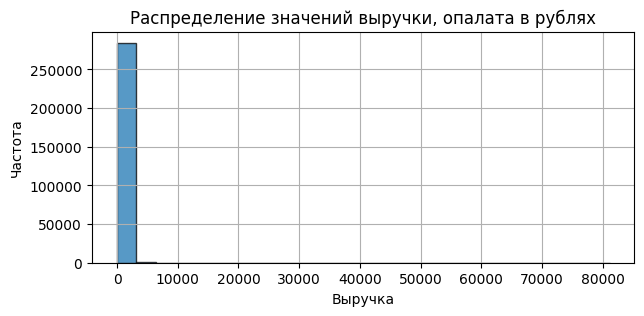

In [25]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_rub['revenue'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений выручки, опалата в рублях')
plt.xlabel('Выручка')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

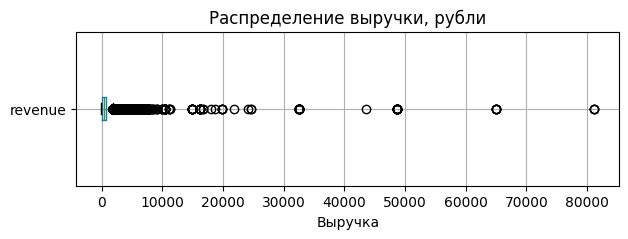

In [26]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_rub.boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки, рубли')
plt.xlabel('Выручка')

# Выводим график
plt.show()

In [27]:
# Проверяем распределение данных по значениям столбца revenue 10000 и больше
print('Распределение данных по значениям столбца revenue 10000 и больше:')
df_rub.loc[df_rub['revenue'] >= 10000]['revenue'].value_counts()

Распределение данных по значениям столбца revenue 10000 и больше:


revenue
32469.82    25
48704.72    19
10396.02    10
16234.91     8
14808.53     5
64939.63     5
14913.53     5
19744.71     4
81174.54     3
11078.63     2
11185.15     2
16617.94     2
24680.88     2
43515.08     1
21757.54     1
24124.85     1
18093.64     1
18641.92     1
Name: count, dtype: int64

Проверим выручку для заказов, оплаченных в казахстанских **тенге**:

In [28]:
print(f"Основные статистические показатели для revenue, тенге:")
display(df_kzt['revenue'].describe())

Основные статистические показатели для revenue, тенге:


count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64

Можно предположить, что данные выручки `revenue` (в тенге) имеют асимметричное распределение с правосторонним смещением, но не столь выраженное, как в предыдущем случае. Ключевые наблюдения:

1. Среднее (4995.21) и медиана (3698.83) различаются, но не так сильно, как в данных с более экстремальными выбросами.  
   - Это указывает на умеренную асимметрию (скошенность вправо).  
2. Стандартное отклонение (4916.75) близко к среднему значению, что говорит о значительном разбросе данных.  
   - Коэффициент вариации (CV = std/mean ≈ 0.98) близок к 1, что типично для финансовых показателей с неравномерным распределением.  
3. Минимальное значение (0.00) может означать бесплатные заказы или ошибки в данных.  
4. Максимальное значение (26425.86) значительно превышает 75-й перцентиль (7397.66), но не настолько экстремально, как в предыдущем анализе.  
   - Это подтверждает наличие крупных заказов, но их влияние на общую картину менее катастрофично.  
   
   
Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с выручкой в тенге.

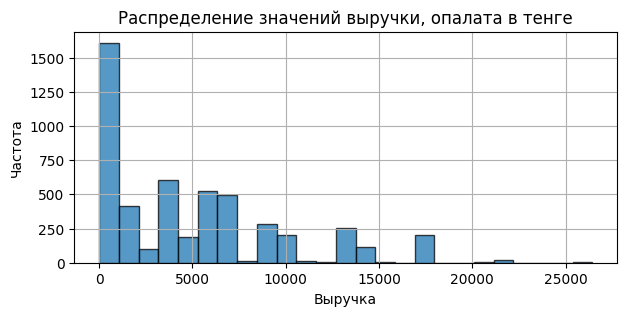

In [29]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_kzt['revenue'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений выручки, опалата в тенге')
plt.xlabel('Выручка')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

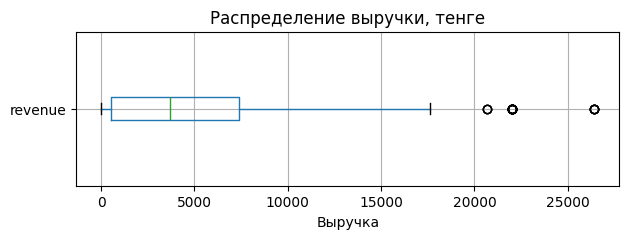

In [30]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_kzt.boxplot(column='revenue', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение выручки, тенге')
plt.xlabel('Выручка')

# Выводим график
plt.show()

In [31]:
# Проверяем распределение данных по значениям столбца revenue 10000 и больше
print('Распределение данных по значениям столбца revenue 10000 и больше:')
df_kzt.loc[df_kzt['revenue'] >= 10000]['revenue'].value_counts()

Распределение данных по значениям столбца revenue 10000 и больше:


revenue
13212.93    255
10338.19    205
17617.24    196
13784.26    116
22021.55     21
11096.49      9
17230.32      8
26425.86      5
11614.05      4
11838.81      4
20676.39      3
15485.40      2
14206.57      1
Name: count, dtype: int64

Очевидно в выручке с заказа `revenue` есть **выбросы**. Отберем значения по 99-му процентилю.

In [32]:
# Рассчитываем 99-й процентиль для revenue
percentile_99 = df_afisha['revenue'].quantile(0.99)

# Фильтруем датафрейм, оставляя только строки с revenue <= 99-му процентилю
df_filtered = df_afisha[df_afisha['revenue'] <= percentile_99]

# Выводим информацию о результате
print(f"99-й процентиль для revenue: {percentile_99:.2f}")
print(f"Исходное количество строк: {len(df_afisha)}")
print(f"Количество строк после фильтрации: {len(df_filtered)}")
print(f"Удалено строк: {len(df_afisha) - len(df_filtered)}")

99-й процентиль для revenue: 4003.13
Исходное количество строк: 290611
Количество строк после фильтрации: 287704
Удалено строк: 2907


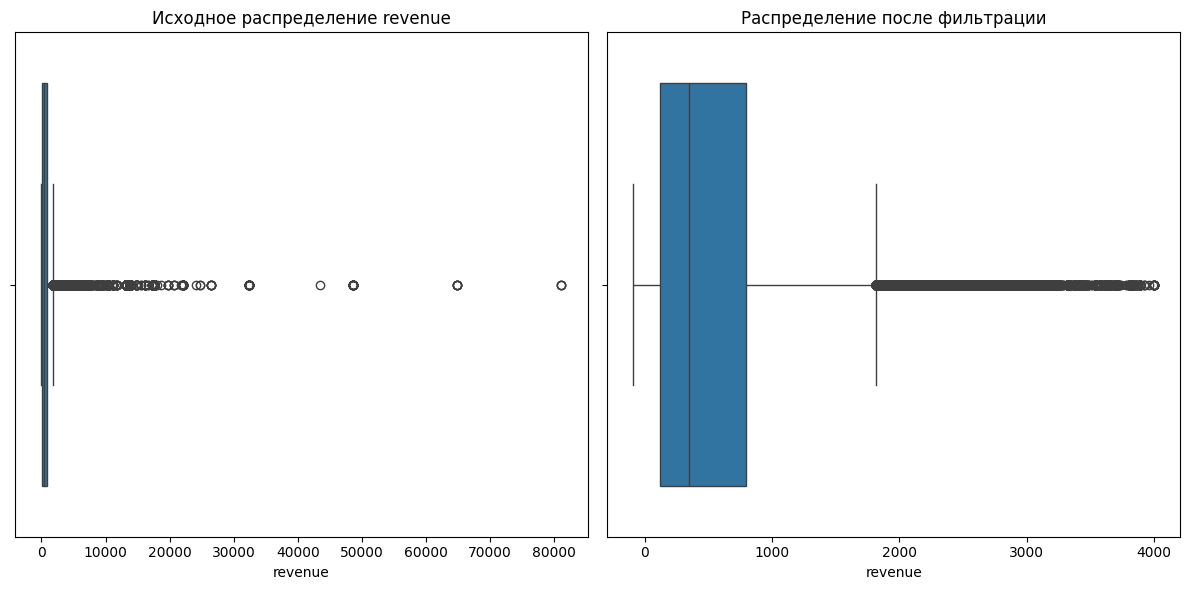

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_afisha['revenue'])
plt.title('Исходное распределение revenue')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_filtered['revenue'])
plt.title('Распределение после фильтрации')

plt.tight_layout()
plt.show()

---

Для анализа данных еще одним важными показателем является количество билетов в заказе `tickets_count`. Исследуем это поле.

In [34]:
# Рассчитаем основные статистические показатели (среднее, медиана, стандартное отклонение и тд) tickets_count для каждой группы
print(f"Основные статистические показатели для tickets_count, рубли:")
display(df_rub['tickets_count'].describe())

Основные статистические показатели для tickets_count, рубли:


count    285542.000000
mean          2.754159
std           1.171575
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64

Можно предположить, что данные количества билетов (`tickets_count`, rub) имеют распределение, близкое к нормальному с правосторонней асимметрией. Об этом свидетельствуют следующие наблюдения:  

- Среднее значение (2.75) и медиана (3.00) достаточно близки, что характерно для нормального или слабо асимметричного распределения.  
- Стандартное отклонение (1.17) относительно невелико по сравнению со средним, что указывает на умеренный разброс данных.  
- Минимальное значение (1) и максимальное (57) сильно различаются, но 75% данных лежат в диапазоне от 1 до 4 билетов, что говорит о редких, но экстремальных случаях (возможно, групповые заказы или ошибки в данных).

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с количеством билетов в заказе в рублях.

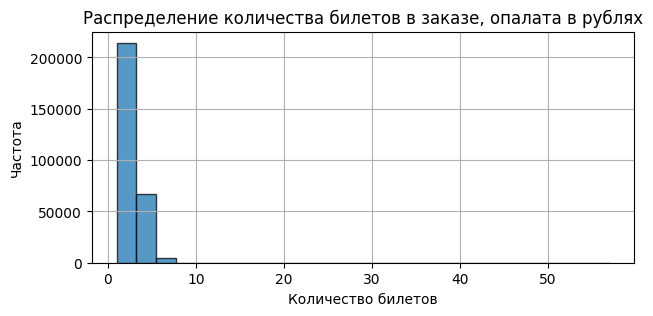

In [35]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_rub['tickets_count'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества билетов в заказе, опалата в рублях')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

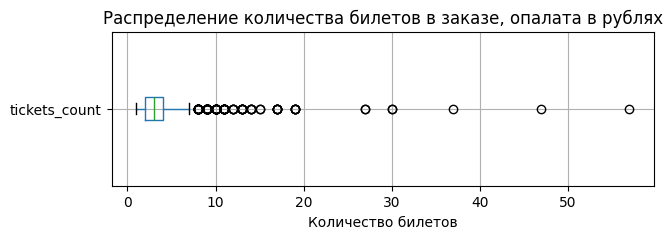

In [36]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_rub.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества билетов в заказе, опалата в рублях')
plt.xlabel('Количество билетов')

# Выводим график
plt.show()  

In [37]:
# Проверяем распределение данных по значениям столбца tickets_count 6 и больше
print('Распределение данных по значениям столбца tickets_count 6 и больше:')
df_rub.loc[df_rub['tickets_count'] >= 6]['tickets_count'].value_counts()

Распределение данных по значениям столбца tickets_count 6 и больше:


tickets_count
6     4214
7       62
9       38
8       21
10      19
11      13
13       7
17       6
19       5
12       4
14       4
15       2
27       2
30       2
47       1
57       1
37       1
Name: count, dtype: int64

In [38]:
print(f"Основные статистические показатели для tickets_count, тенге:")
display(df_kzt['tickets_count'].describe())

Основные статистические показатели для tickets_count, тенге:


count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: tickets_count, dtype: float64

Можно предположить, что данные **количества билетов** (tickets_count) имеют распределение, близкое к **нормальному**. Об этом говорит близость среднего (2.76) и медианного (3.00) значений. Однако значение стандартного отклонения составляет 1.12, что при среднем 2.76 указывает на умеренный разброс данных. Разница между минимальным (1) и максимальным (6) значениями также подтверждает наличие некоторой вариативности, но не чрезмерной.  


Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с количеством билетов в заказе в тенге.

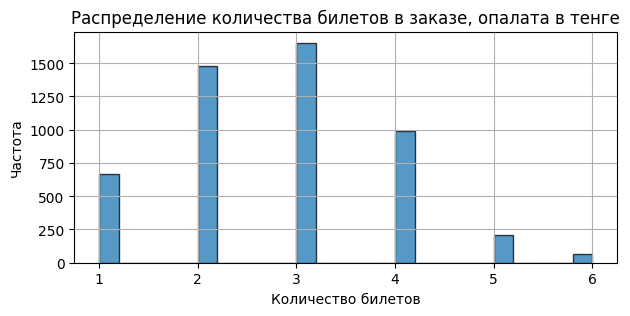

In [39]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_kzt['tickets_count'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=25, # Устанавливаем количество корзин - всего 25
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества билетов в заказе, опалата в тенге')
plt.xlabel('Количество билетов')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

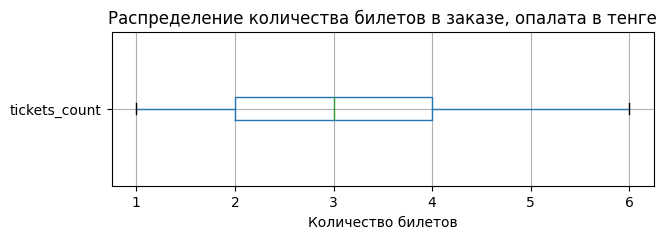

In [40]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_kzt.boxplot(column='tickets_count', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества билетов в заказе, опалата в тенге')
plt.xlabel('Количество билетов')

# Выводим график
plt.show() 

Поле `tickets_count` имеет умеренный разброс данных с небольшой правосторонней ассиметрией, особенно это заметно для билетов, оплаченных в рублях. Однако, такое поведение может быть связано с крупными заказами - такие данные следует оставить.

***Численные признаки исследованы, аномалии обработаны.***

---

### Проверяем явные и неявные дубликаты

In [41]:
# Определим количество строк в датафрейме до удаления явных дубликатов
initial_row_count = len(df_filtered)
print(f'Кол-во строк до удаления дубликатов: {initial_row_count}')

# Найдем дублирующиеся строки
duplicates = df_filtered[df_filtered.duplicated()]
print('Дублирующиеся строки:')
display(duplicates)

# Удаляем дублирующиеся строки
df_afisha = df_filtered.drop_duplicates()

# Определим кол-во строк в датафрейме после удаляения дубликатов
final_row_count = len(df_afisha)
if final_row_count == initial_row_count:
    print('Явных дубликатов не обнаружено.')
else:
    print(f'Кол-во строк после удаления дубликатов: {final_row_count}')

Кол-во строк до удаления дубликатов: 287704
Дублирующиеся строки:


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address


Явных дубликатов не обнаружено.


In [42]:
# Для следующего шага понадобятся названия почти всех столбцов df_afisha, упростим их перечисление
df_afisha.columns

Index(['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'revenue_rub', 'event_name', 'event_type_description',
       'event_type_main', 'organizers', 'region_name', 'city_name', 'city_id',
       'venue_id', 'venue_name', 'venue_address'],
      dtype='object')

In [43]:
# Проверка неявных дубликатов (без учёта order_id)
cols_to_check = ['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev',
       'revenue_rub', 'event_name', 'event_type_description',
       'event_type_main', 'organizers', 'region_name', 'city_name', 'city_id',
       'venue_id', 'venue_name', 'venue_address']
print("Неявные дубликаты (по ключевым полям):", df_afisha.duplicated(subset=cols_to_check).sum())

Неявные дубликаты (по ключевым полям): 30


In [44]:
# Удаление неявных дубликатов (оставляем первое вхождение)
df_cleaned = df_afisha.drop_duplicates(subset=cols_to_check, keep='first').copy()

# Проверка оставшихся данных
print(f"Исходный размер данных: {df_afisha.shape}")
print(f"Размер после удаления дубликатов: {df_cleaned.shape}")
print(f"Строк удалено: {len(df_afisha) - len(df_cleaned)}({(len(df_afisha)-len(df_cleaned))/len(df_afisha)}%)")

Исходный размер данных: (287704, 25)
Размер после удаления дубликатов: (287674, 25)
Строк удалено: 30(0.000104273836999138%)


---

### Проведем преобразование типов данных

In [45]:
# Преобразовываем типы данных с понижением разрядности
for column in ['order_id', 'event_id', 'age_limit', 'tickets_count', 'city_id', 'venue_id']:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], downcast='integer')

In [46]:
# Преобразовываем тип данных столбца created_ts_msk к типу datetime64
df_cleaned['created_ts_msk'] = pd.to_datetime(df_cleaned['created_ts_msk'])

In [47]:
# Проверяем преобразования
df_cleaned[['created_ts_msk', 'order_id', 'event_id', 'age_limit', 'tickets_count', 'city_id', 'venue_id']].dtypes

created_ts_msk    datetime64[ns]
order_id                   int32
event_id                   int32
age_limit                   int8
tickets_count               int8
city_id                    int32
venue_id                   int16
dtype: object

---

### Создаем новые столбцы

- Ранее уже был создан столбец `revenue_rub` — в нем приведена выручка с заказа к единой валюте — российскому рублю.

Также стоит добавить:
- `one_ticket_revenue_rub` — с расчетом выручки с продажи одного билета на мероприятие.
- `month` — с выделенным месяцем оформления заказа в отдельный столбец.
- `season` — столбец с информацией о сезонности, включая такие категории, как: 'лето', 'осень', 'зима', 'весна'.

In [48]:
# Создаем поле one_ticket_revenue_rub:
# Проверка на нули
if (df_cleaned['tickets_count'] == 0).any():
    print("Есть билеты с нулевым количеством! Замените их на 1 или удалите.")
    df_cleaned = df_cleaned[df_cleaned['tickets_count'] > 0]  # Игнорируем нули
    
# Добавляем поле с расчетом выручки с продажи одного билета на мероприятие
df_cleaned['one_ticket_revenue_rub'] = round(df_cleaned['revenue_rub'] / df_cleaned['tickets_count'], 2)

df_cleaned.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,one_ticket_revenue_rub
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",380.48
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",144.72
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",314.64
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",4.24
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",463.47


In [49]:
# Добавляем столбец с месяцем оформления заказа:
df_cleaned['month'] = df_cleaned['created_dt_msk'].dt.month

# Добавим название месяца в текстовом формате
#df_cleaned['month_name'] = df_cleaned['created_dt_msk'].dt.month_name(locale='ru')  # для русского языка
# или так, если locale не поддерживается:
df_cleaned['month_name'] = df_cleaned['created_dt_msk'].dt.strftime('%B')

# Проверяем результат
display(df_cleaned[['created_dt_msk', 'month', 'month_name']].head())

,created_dt_msk,month,month_name
0,2024-08-20,8,August
1,2024-07-23,7,July
2,2024-10-06,10,October
3,2024-07-13,7,July
4,2024-10-04,10,October


In [50]:
# Создаем поле season:
# Определяем функцию для сезона
def get_season(month):
    if 3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

# Применяем функцию к столбцу month и создаём season
df_cleaned['season'] = df_cleaned['month'].apply(get_season)

# Проверяем результат
print(df_cleaned[['created_dt_msk', 'month', 'month_name', 'season']].head()) 

  created_dt_msk  month month_name season
0     2024-08-20      8     August   лето
1     2024-07-23      7       July   лето
2     2024-10-06     10    October  осень
3     2024-07-13      7       July   лето
4     2024-10-04     10    October  осень


In [51]:
# Считаем, сколько строк стало после предобработки. Понадобится в выводах
final_row_count_2 = len(df_cleaned)

***Новые признаки успешно добавлены в выборку.***

---

### Основные выводы и результаты по предобработке данных

В процессе подготовки данных были удалены строки с пропусками и дубликаты. Посчитаем количество удалённых строк в абсолютном и относительном значениях.


In [52]:
# Считаем количество удленных строк
deleted_rows_total = initial_row_count_2 - final_row_count_2
deleted_rows_perc = round((initial_row_count_2 - final_row_count_2) / initial_row_count_2 *100, 2)
print(f'Всего за обработку данных было удалено: {deleted_rows_total} ({deleted_rows_perc} %) строк.')

Всего за обработку данных было удалено: 3175 (1.09 %) строк.


В результате **предобработки** данных и подготовки их к исследованию были выполнены следующие дейтвия и получены такие **результаты**:

#### Итоговый объем данных после фильтрации  
- Исходный размер датафрейма: 287 704 строк × 25 столбцов.  
- Удалено всего: 3 175 строк (1.09%) (включая пропуски и дубликаты).  
- Окончательный размер данных: 284 529 строк. 

Таким образом, несмотря на небольшое количество удалённых записей, это может существенно улучшить качество данных, что, в свою очередь, поможет обеспечить более точные и надёжные результаты при дальнейшей обработке и анализе.

#### Основные действия на этапе предобработки  
✔️ Очистка от пропусков:  
   - Удалены 238 строк (0.1%) с MCAR-пропусками (случайные пропуски в категориальных полях).  
   - Оставлены 21 940 пропусков (7.5%) в days_since_prev (структурные, связанные с первыми заказами).  

✔️ Обработка дубликатов:  
   - Удалено 30 неявных дубликата (по ключевым полям).  

✔️ Работа с выбросами:  
   - Выручка (`revenue`): отфильтрованы значения по 99-му процентилю (из-за сильной асимметрии).  
   - Количество билетов (`tickets_count`): выбросы сохранены, так как соответствуют реальным крупным заказам.  

✔️ Преобразование типов данных:  
   - Оптимизированы числовые столбцы (`order_id`, `event_id` и др.) с понижением разрядности.  
   - Дата заказа (`created_ts_msk`, `created_dt_msk`) приведена к формату datetime64. 

✔️ Создание новых признаков:  
   - `revenue_rub` — выручка с заказа в единой валюте (российский рубль).
   - `one_ticket_revenue_rub` — выручка с продажи одного билета на мероприятие.
   - `month` — номер месяца оформления заказа.
   - `month_name` - название месяца оформления заказа.
   - `season` — информация о сезонности (лето/осень/зима/весна).

#### Промежуточный вывод  
Предобработка данных выполнена:  
✅ Удалены незначительные пропуски и дубликаты (без существенной потери данных).  
✅ Проведена оптимизация типов и обработка выбросов.  
✅ Добавлены новые аналитические признаки для углубленного исследования.   

Датасет готов к дальнейшему анализу!

---

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения
 Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов 
увеличивается. На стадии исследовательского анализа изучим изменение пользовательской активности 
или пользовательского интереса в связи с сезонностью. Анализируем динамику по таким разрезам:
 - тип мероприятия `event_type_main`;
 - тип устройства `device_type_canonical`;
 - категория мероприятий по возрастному рейтингу `age_limit`.
 
Для начала изучим распределение заказов по сегментам и их сезонные изменения, выполнив следующие **шаги**:
 1. Для каждого месяца найдем количество заказов:

In [53]:
# Группируем по месяцам и считаем кол-во заказов
monthly_orders = df_cleaned.groupby('month_name')['order_id'].count().reset_index()
monthly_orders.columns = ['month_name', 'orders_count']

# Сортируем месяцы в правильном порядке
month_order = ['June', 'July', 'August', 'September', 'October']
monthly_orders['month_name'] = pd.Categorical(monthly_orders['month_name'], categories = month_order, ordered=True)
monthly_orders = monthly_orders.sort_values('month_name')

display(monthly_orders)

,month_name,orders_count
2,June,32659
1,July,40739
0,August,44707
4,September,69678
3,October,99891


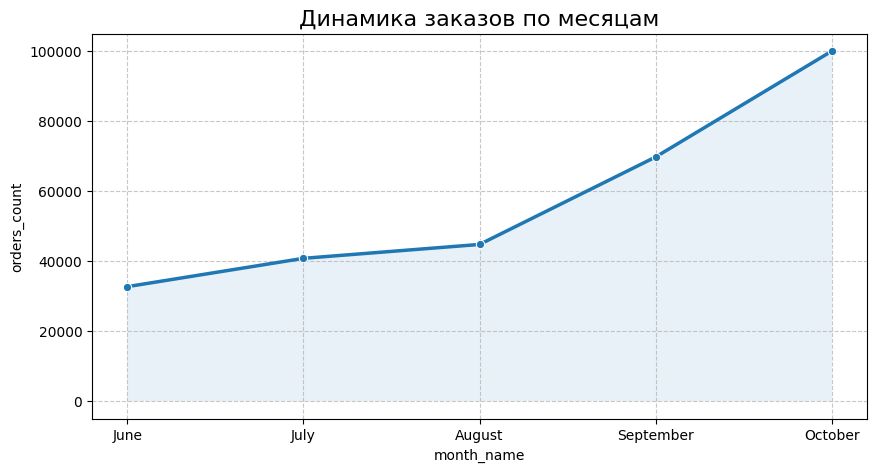

In [54]:
# Визуализируем результаты и проверим, фиксируется ли увеличение заказов от июня к ноябрю 2024 года
plt.figure(figsize = (10, 5))

sns.lineplot(
    x = 'month_name', 
    y = 'orders_count', 
    data = monthly_orders, 
    marker = 'o', 
    linewidth = 2.5
)

plt.fill_between(
    monthly_orders['month_name'], 
    monthly_orders['orders_count'], 
    alpha = 0.1)

plt.title('Динамика заказов по месяцам', fontsize = 16)
plt.xticks(rotation = 0)
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

2. Для осеннего и летнего периодов сравним распределение заказов билетов по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. 

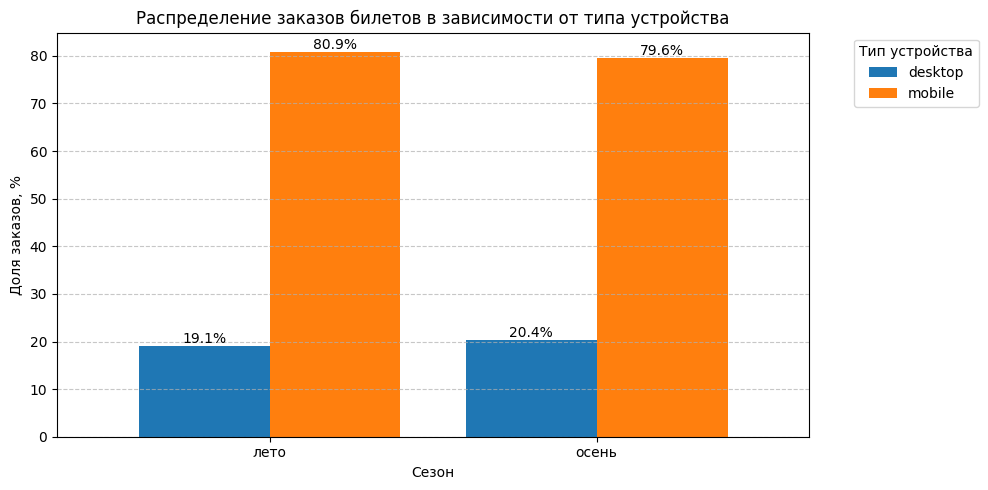

In [55]:
# Группируем данные и считаем доли для каждого сезона по типу устройства
grouped = (df_cleaned.groupby('season')['device_type_canonical']
           .value_counts(normalize=True)
           .unstack(fill_value=0)
           .mul(100))  # переводим в проценты

# Построим график столбчатой диаграммы
ax = grouped.plot(kind='bar',
               title=f'Распределение заказов билетов в зависимости от типа устройства',
               legend=True,
               ylabel='Доля заказов, %',
               xlabel='Сезон',
               rot=0,
               figsize=(10, 5),
               width=0.8)

# Добавляем подписи значений
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Тип устройства', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Выводим график
plt.show()

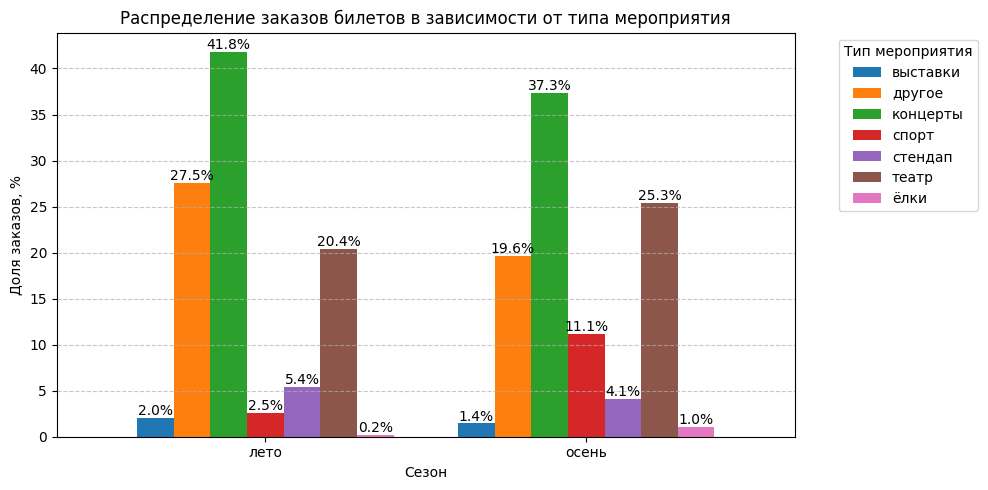

In [56]:
# Группируем данные и считаем доли для каждого сезона по типу мероприятия
grouped = (df_cleaned.groupby('season')['event_type_main']
           .value_counts(normalize=True)
           .unstack(fill_value=0)
           .mul(100))  # переводим в проценты

# Построим график столбчатой диаграммы
ax = grouped.plot(kind='bar',
               title=f'Распределение заказов билетов в зависимости от типа мероприятия',
               legend=True,
               ylabel='Доля заказов, %',
               xlabel='Сезон',
               rot=0,
               figsize=(10, 5),
               width=0.8)

# Добавляем подписи значений
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Тип мероприятия', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Выводим график
plt.show()

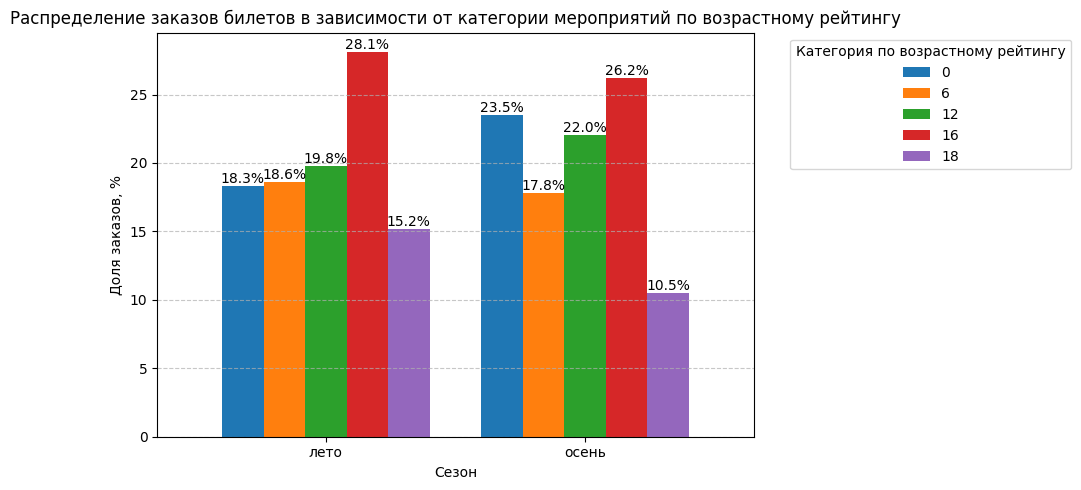

In [57]:
# Группируем данные и считаем доли для каждого сезона по типу мероприятия
grouped = (df_cleaned.groupby('season')['age_limit']
           .value_counts(normalize=True)
           .unstack(fill_value=0)
           .mul(100))  # переводим в проценты

# Построим график столбчатой диаграммы
ax = grouped.plot(kind='bar',
               title=f'Распределение заказов билетов в зависимости от категории мероприятий по возрастному рейтингу',
               legend=True,
               ylabel='Доля заказов, %',
               xlabel='Сезон',
               rot=0,
               figsize=(10, 5),
               width=0.8)

# Добавляем подписи значений
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Категория по возрастному рейтингу', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Выводим график
plt.show()

3. Изучим изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью: видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий. Для каждого типа мероприятия рассчитаем среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. Результат сопровождается визуализациями. 

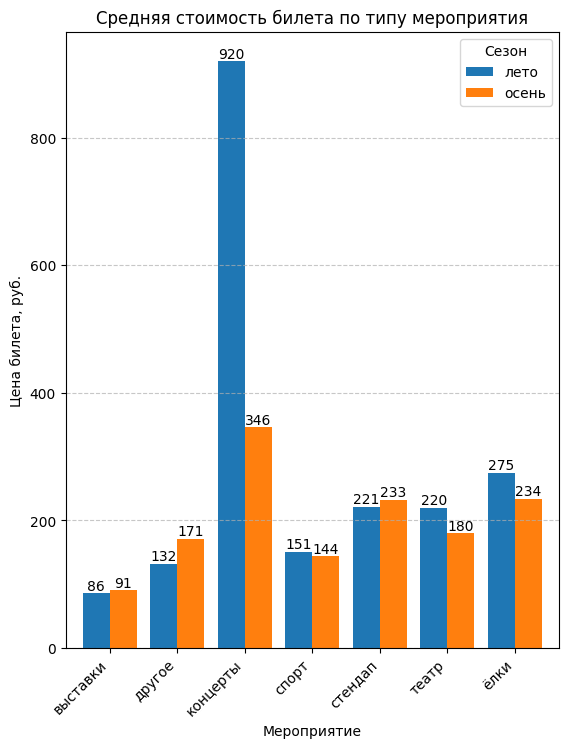

In [58]:
# Расчет средних значений:
# Группируем по сезону и типу мероприятия, считаем среднюю цену билета
price_by_season = df_cleaned.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().unstack()

# Визуализация
plt.figure(figsize=(14, 8))

# График средней цены билета по сезонам
plt.subplot(1, 2, 1)
price_by_season.T.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Средняя стоимость билета по типу мероприятия')
plt.ylabel('Цена билета, руб.')
plt.xlabel('Мероприятие')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Сезон')

# Добавление подписей значений
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')

In [59]:
# Расчет относительного изменения
relative_change = ((price_by_season.loc['осень'] - price_by_season.loc['лето']) / 
                   price_by_season.loc['лето'] * 100).sort_values(ascending=False)

# Таблица с результатами для наглядности
result_table = price_by_season.T
result_table['change_%'] = relative_change
print("\nТаблица средних цен и изменений:")
display(result_table.sort_values('change_%', ascending=False))


Таблица средних цен и изменений:


season,лето,осень,change_%
event_type_main,,,
другое,131.964381,171.359054,29.852505
выставки,86.415530,91.066438,5.382029
стендап,221.284448,232.626348,5.125485
спорт,151.014425,144.228799,-4.493363
ёлки,274.748764,234.215251,-14.752937
театр,220.033678,179.697000,-18.332047
концерты,919.812453,346.320133,-62.348832


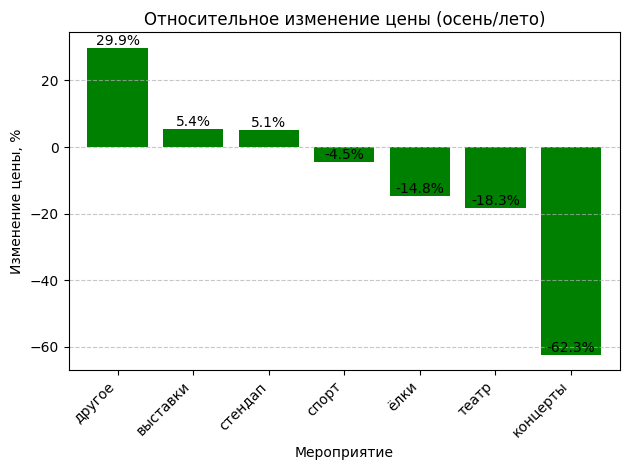

In [60]:
# График относительного изменения
relative_change.plot(kind='bar', color='green', ax=plt.gca(), width=0.8)
plt.title('Относительное изменение цены (осень/лето)')
plt.ylabel('Изменение цены, %')
plt.xlabel('Мероприятие')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавление подписей значений
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()
plt.show()

#### ВЫВОДЫ:

Распределние заказов в каждой из категорий с наступлением осени меняется следующим образом:
- Фиксируется сильное увеличение заказов от июня (32 659 заказов) к ноябрю (99 884 заказов) 2024 года.
- Однако, распределение заказов билетов по типу устройства показывает, что как для лета, так и для осени, доля мобильных устройств и доля стационарных компьютеров распределены 80%/20% соответвенно.
- Распределение заказов билетов в зависимости от типа мероприятия: в оба сезона лидируют "концерты" (~40% заказов), интерес публики к категории "другое" осенью падает (с 27.5% до 19.6%). Стоит также обратить внимание, что осенью возрастает внимание к театру (с 20.4% до 25.3%) и особенно к спортивным меропритиям, почти в 5 раз (с 2.5% до 11.1%).
- Распределение заказов билетов в зависимости от категории мероприятий по возрастному рейтингу показывает, что осенью публика из категории "16+" становится чуть менее активной, чем летом (с 28.1% до 26.2% заказов присодится на них), это же касается категории "18+" (с 15.2% до 10.5% заказов). В то же время для категорий "0+"(с 18.3% до 23.5%) и "12+"(с 19.8% до 22%) к осени наблюдается небольшой рост. 


Если говорить про изменение выручки с продажи одного билета в зависимости от типа мероприятия летом и осенью, то стоит заметить, что средняя стоиомсть билета на концерты летом практически в 2,5 раза выше, чем осенью (919 руб. vs 346 руб.). Для остальных типов мероприятий стоимость билета не сильно различатся для двух сезонов.

Тем не менее, видна сильная динамика изменения среднего значения выручки с одного билета: относительное изменение осенних значений по сравнению с летними особенно заметно для категории "другое" (+29.8%) и категрий "елки"(-14.8%), "театр"(-18.3%), "концерты"(-62.3%).

**Краткий итог:**

С наступлением осени общее количество заказов значительно увеличивается, но структура распределения по категориям меняется неоднородно: растёт спрос на театр и спорт, снижается интерес к концертам и мероприятиям категории "другое". При этом средняя стоимость билета на концерты осенью резко падает, тогда как для других категорий изменения менее выражены, за исключением заметного роста цен в категории "другое".  

С наступлением осени общее количество заказов значительно увеличивается, но структура распределения по категориям меняется неоднородно: растёт спрос на театр и спорт, снижается интерес к концертам и мероприятиям категории "другое". При этом средняя стоимость билета на концерты осенью резко падает, тогда как для других категорий изменения менее выражены, за исключением заметного роста цен в категории "другое".  

*Уточнение:*
Основной сдвиг — перераспределение интереса от концертов (падение цены и доли) к театру и спорту, при сохранении доли мобильных заказов (~80%). Это может указывать на сезонное изменение формата мероприятий (меньше масштабных концертов, больше локальных событий).

---

### Осенняя активность пользователей

Изучим активность пользователей осенью 2024 года. 

Для начала проанализируем динамику изменений по **дням** (общее число заказов, количество активных пользователей DAU, среднее число заказов на одного пользователя, средняя стоимость одного билета). Для этого создадим сводную таблицу:

In [61]:
# Фильтруем осенние месяца
autumn_orders = df_cleaned[df_cleaned['season']=='осень'].copy()

# Создаем сводную таблицу с нужными метриками
daily_metrics_pivot = autumn_orders.groupby(autumn_orders['created_dt_msk']).agg(
    total_orders=('order_id', 'count'),
    dau=('user_id', pd.Series.nunique),
    avg_ticket_price = ('one_ticket_revenue_rub', 'mean')
)
    
# Добавляем метрику "среднее число заказов на одного пользователя"
daily_metrics_pivot['avg_orders_per_user']  = round(daily_metrics_pivot['total_orders'] / daily_metrics_pivot['dau'], 1)

print('Активность пользователей осенью 2024 года по дням:')
display(daily_metrics_pivot)

Активность пользователей осенью 2024 года по дням:


,total_orders,dau,avg_ticket_price,avg_orders_per_user
created_dt_msk,,,,
2024-09-01,1346,569,270.039510,2.4
2024-09-02,1381,574,457.503722,2.4
2024-09-03,5112,778,151.227559,6.6
2024-09-04,1774,687,608.625784,2.6
2024-09-05,1943,740,507.170360,2.6
...,...,...,...,...
2024-10-27,2862,1036,206.988319,2.8
2024-10-28,2851,987,220.460726,2.9
2024-10-29,2884,1002,229.183211,2.9


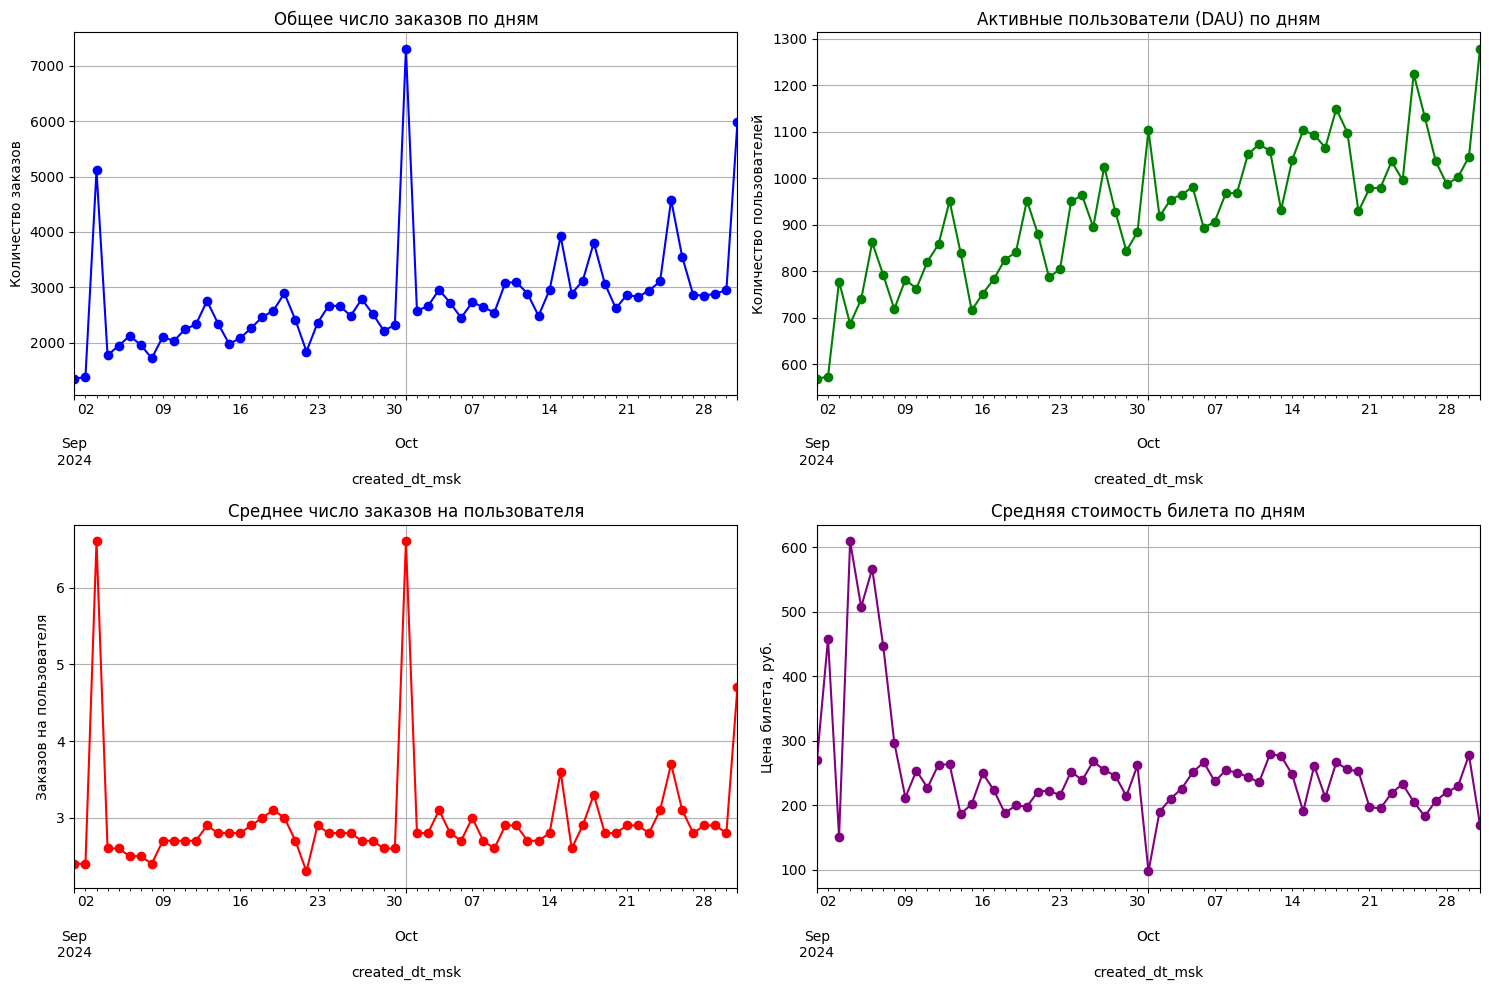

In [62]:
# Строим графики
plt.figure(figsize=(15, 10))

# График общего числа заказов
plt.subplot(2, 2, 1)
daily_metrics_pivot['total_orders'].plot(kind='line', marker='o', color='blue')
plt.title('Общее число заказов по дням')
plt.ylabel('Количество заказов')
plt.grid(True)

# График DAU
plt.subplot(2, 2, 2)
daily_metrics_pivot['dau'].plot(kind='line', marker='o', color='green')
plt.title('Активные пользователи (DAU) по дням')
plt.ylabel('Количество пользователей')
plt.grid(True)

# График среднего числа заказов на пользователя
plt.subplot(2, 2, 3)
daily_metrics_pivot['avg_orders_per_user'].plot(kind='line', marker='o', color='red')
plt.title('Среднее число заказов на пользователя')
plt.ylabel('Заказов на пользователя')
plt.grid(True)

# График средней стоимости билета
plt.subplot(2, 2, 4)
daily_metrics_pivot['avg_ticket_price'].plot(kind='line', marker='o', color='purple')
plt.title('Средняя стоимость билета по дням')
plt.ylabel('Цена билета, руб.')
plt.grid(True)

plt.tight_layout()
plt.show()

Также полезно будет изучить недельную цикличность: выделим дни недели и сравним пользовательскую активность в **будни и выходные**:

In [63]:
# Создаем копию данных и добавляем столбцы с днем недели и типом дня (будни/выходные)
autumn_orders['day_of_week'] = autumn_orders['created_dt_msk'].dt.day_name()
autumn_orders['day_type'] = autumn_orders['created_dt_msk'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'weekday')

# Агрегируем данные по дням недели
weekday_metrics_pivot = autumn_orders.groupby(['day_of_week', 'day_type']).agg(
    total_orders=('order_id', 'count'),
    unique_users=('user_id', pd.Series.nunique),
    avg_orders_per_user=('order_id', lambda x: x.count() / x.nunique()),
    avg_ticket_price=('revenue_rub', 'mean')
).reset_index()

# Упорядочим дни недели правильно
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_metrics_pivot['day_of_week'] = pd.Categorical(weekday_metrics_pivot['day_of_week'], categories=weekday_order, ordered=True)
weekday_metrics_pivot = weekday_metrics_pivot.sort_values('day_of_week')

display(weekday_metrics_pivot)

,day_of_week,day_type,total_orders,unique_users,avg_orders_per_user,avg_ticket_price
1,Monday,weekday,21641,4458,1.0,638.312598
5,Tuesday,weekday,31650,4799,1.0,497.852206
6,Wednesday,weekday,23033,4838,1.0,680.699331
4,Thursday,weekday,27288,4977,1.0,618.690688
0,Friday,weekday,24987,4876,1.0,667.440241
2,Saturday,weekend,21462,4581,1.0,649.286793
3,Sunday,weekend,19508,4399,1.0,640.391022


In [64]:
# Сравнение будней и выходных (агрегированные данные)
daytype_comparison = weekday_metrics_pivot.groupby('day_type').agg({
    'total_orders': 'mean',
    'unique_users': 'mean',
    'avg_orders_per_user': 'mean',
    'avg_ticket_price': 'mean'
})

print("Сравнение средних показателей в будни и выходные:")
display(daytype_comparison)

Сравнение средних показателей в будни и выходные:


,total_orders,unique_users,avg_orders_per_user,avg_ticket_price
day_type,,,,
weekday,25719.8,4789.6,1.0,620.599013
weekend,20485.0,4490.0,1.0,644.838907


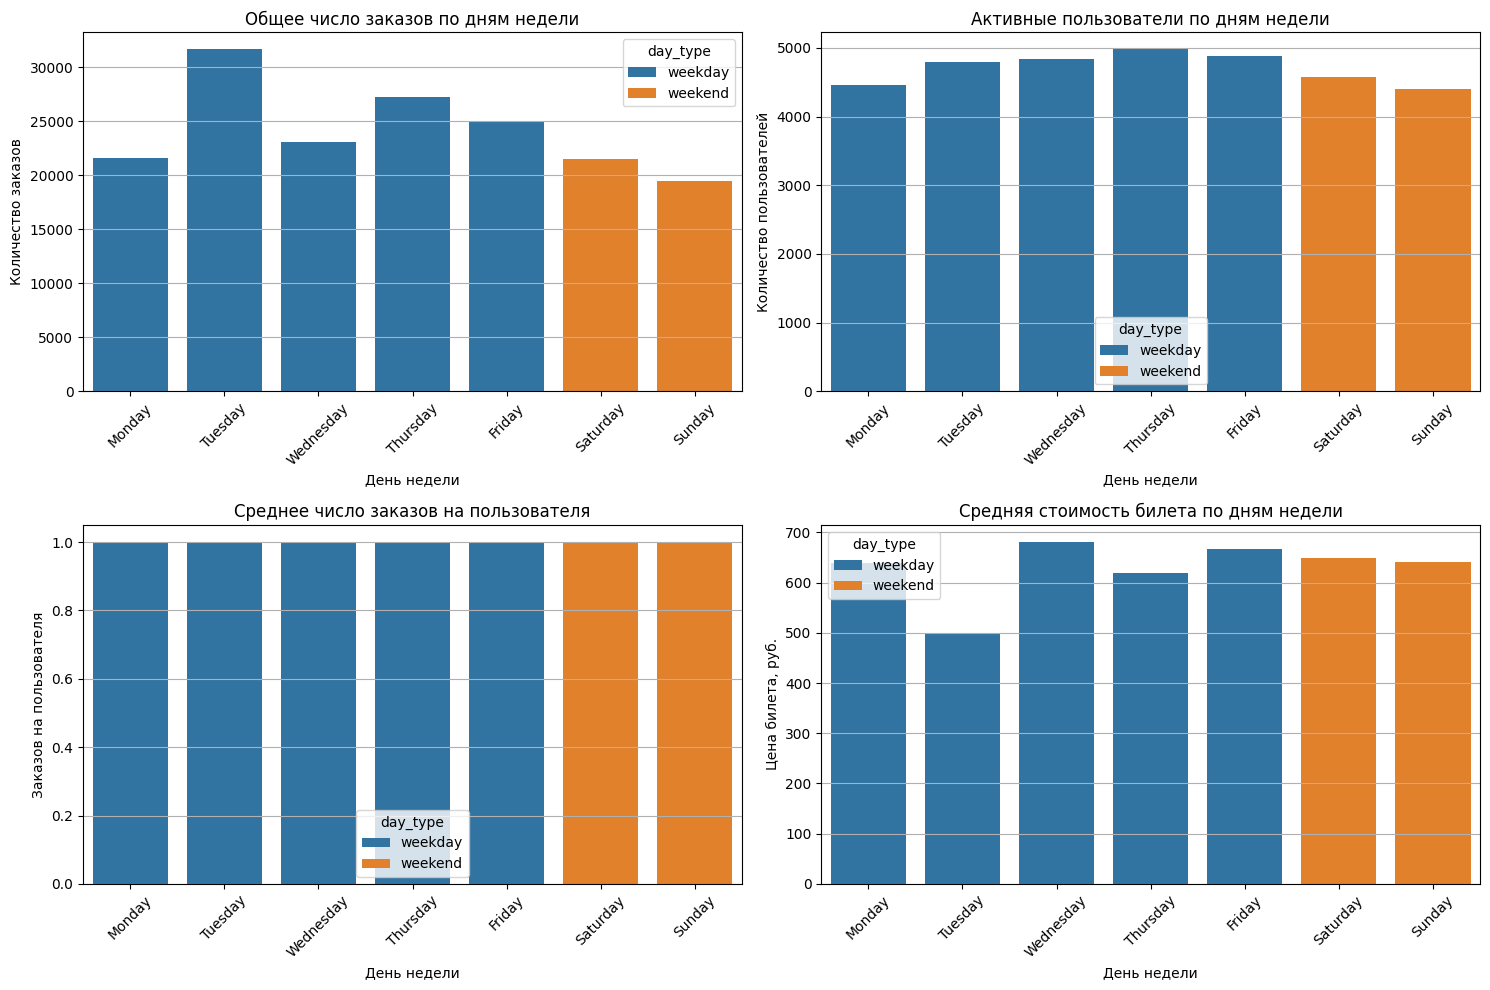

In [65]:
# Строим графики
plt.figure(figsize=(15, 10))

# График общего числа заказов
plt.subplot(2, 2, 1)
sns.barplot(x='day_of_week', y='total_orders', hue='day_type', data=weekday_metrics_pivot)
plt.title('Общее число заказов по дням недели')
plt.ylabel('Количество заказов')
plt.xlabel('День недели')
plt.xticks(rotation=45)
plt.grid(axis='y')

# График уникальных пользователей DAU
plt.subplot(2, 2, 2)
sns.barplot(x='day_of_week', y='unique_users', hue='day_type', data=weekday_metrics_pivot)
plt.title('Активные пользователи по дням недели')
plt.ylabel('Количество пользователей')
plt.xlabel('День недели')
plt.xticks(rotation=45)
plt.grid(axis='y')

# График среднего числа заказов на пользователя
plt.subplot(2, 2, 3)
sns.barplot(x='day_of_week', y='avg_orders_per_user', hue='day_type', data=weekday_metrics_pivot)
plt.title('Среднее число заказов на пользователя')
plt.ylabel('Заказов на пользователя')
plt.xlabel('День недели')
plt.xticks(rotation=45)
plt.grid(axis='y')

# График средней стоимости билета
plt.subplot(2, 2, 4)
sns.barplot(x='day_of_week', y='avg_ticket_price', hue='day_type', data=weekday_metrics_pivot)
plt.title('Средняя стоимость билета по дням недели')
plt.ylabel('Цена билета, руб.')
plt.xlabel('День недели')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

#### ВЫВОДЫ:

Динамика изменений по дням показала, что:
- С начала сентября общее число заказов с каждым днем по немногу росло, начиная с ~1500 заказов и до ~3000 заказов к концу рассматриваемого периода. Пик пришелся на 1 октября (более 7000 заказов).


- Метрика "DAU" (количество активных пользователей) также показала стабильный рост относительно начала периода: от ~600 юзеров до ~1200 каждый день. Наблюдаются небольшие скачки, но они не критичны. Пиковое значение пришлось на 31 октября (почти 1300 активных пользователей).


- Среднее число заказов на одного пользователя в среднем колеблется от 1 до 3 и имеет пиковое значение 3 сенятбря (6-7 заказов на пользователя) и 1 октября (6-7 заказов на пользователя).


- Показатель средней стоимости одного билета в среднем варьируется от 400 руб. до 800 руб. Минимальное значение приходится 1 октября (менее 200 руб.), 3 сентября (чуть меньше 400 руб.) и 31 октября (около 400 руб.). Скорее всего, именно этот фактор повлиял на большое количество заказов и активных пользователей. Что касается самых дорогих билетов, они продавались 4-6 сентября и их цена в среднем составила 1150-1250 руб.


Что касается недельной цикличности:
- общее число заказов больше всего по вторникам (более 30 тыс.), наименьшее призодится на воскресенье - менее 20 тыс. заказов.

  
- Активные пользователи по дням недели: метрика колеблется от примерно 4400 до 5000 пользователей, с наибольшим значением в четверг (5000) и наименьшим в воскресенье (~4400).


- Интересно, что среднее число заказов на пользователя каждый день одинаковое и равно 1.


- Средняя стоимость билета по дням недели: самые дешевые продавались по вторникам (500 руб.), самые дорогие - в среду (чуть менее 700 руб.).

**Краткий итог:**

Пользовательская активность демонстрирует устойчивый рост с заметными пиками в дни с минимальной средней стоимостью билетов (1 октября, 3 сентября). Недельная цикличность показывает наибольшую активность по вторникам и четвергам, в то время как воскресенье остается наименее активным днём. Снижение цены билетов коррелирует с увеличением числа заказов и DAU, что указывает на высокую чувствительность спроса к стоимости.

---

### Популярные события и партнеры
После того как мы изучили изменение популярности событий и пользовательской активности осенью 2024 
года, посмотрим, как события распределены по регионам и партнёрам. Это позволит выделить 
ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.

1. Для каждого региона посчитаем уникальное количество мероприятий, общее число заказов и выручку. Также добавим долю проводимых мероприятий от их общего числа, долю заказов в регионе от общего и долю выручки в регионе от общей выручки:

In [66]:
# Группировка по регионам
region_stats = autumn_orders.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).sort_values('total_orders', ascending=False)

# Округляем выручку до 2 знаков после запятой (чтобы избежать экспоненциальной записи)
region_stats['total_revenue'] = region_stats['total_revenue'].round(2)

# Добавляем доли
total_events = region_stats['unique_events'].sum()
total_orders_all = region_stats['total_orders'].sum()
total_revenue_all = region_stats['total_revenue'].sum()

# Доля проводимых мероприятий от их общего числа
region_stats['events_share'] = (region_stats['unique_events'] / total_events * 100).round(3)  
# Доля заказов в регионе от общего числа заказов
region_stats['orders_share'] = (region_stats['total_orders'] / total_orders_all * 100).round(3)
# Доля выручки в регионе от общей выручки
region_stats['revenue_share'] = (region_stats['total_revenue'] / total_revenue_all * 100).round(3)

display(region_stats)

,unique_events,total_orders,total_revenue,events_share,orders_share,revenue_share
region_name,,,,,,
Каменевский регион,3930,47268,31947151.14,24.709,27.875,30.357
Североярская область,2620,20853,10930154.27,16.473,12.298,10.386
Медовская область,369,12049,2357183.08,2.320,7.106,2.240
Широковская область,803,8739,4294866.32,5.049,5.154,4.081
Озернинский край,296,7579,6914089.81,1.861,4.470,6.570
...,...,...,...,...,...,...
Светолесский край,2,18,7871.89,0.013,0.011,0.007
Островогорский округ,4,18,18333.56,0.025,0.011,0.017
Крутоводский регион,5,14,2726.21,0.031,0.008,0.003


C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_4632\1128067078.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_4632\1128067078.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_4632\1128067078.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


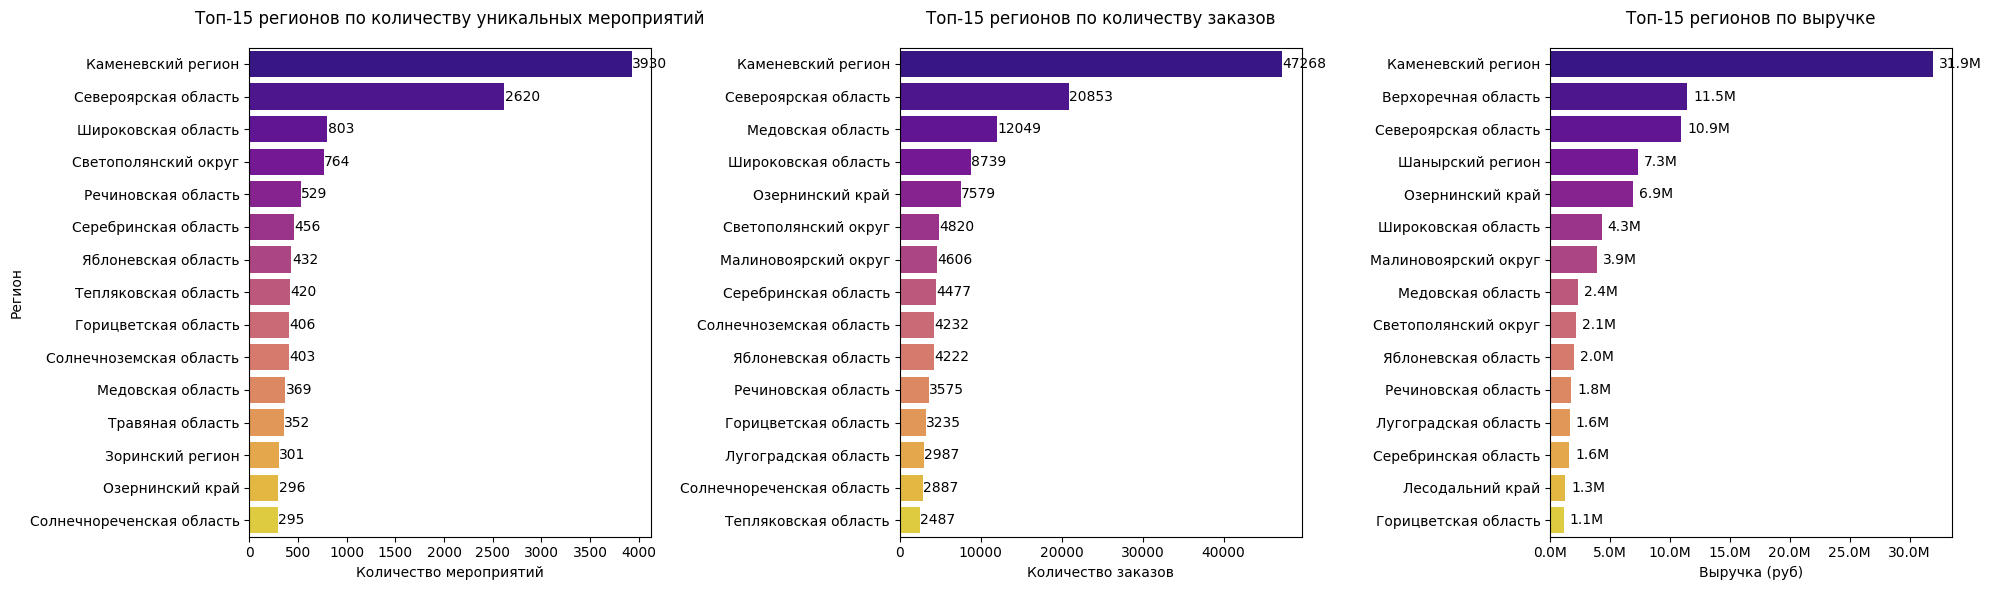

In [67]:
# Создаем фигуру с 3 подграфиками
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Распределение уникальных мероприятий по регионам (топ-15):
top_regions = region_stats.sort_values('unique_events', ascending = False).head(15)
sns.barplot(
    x = 'unique_events', 
    y = top_regions.index, 
    data = top_regions, 
    ax = axes[0], 
    palette = 'plasma')
axes[0].set_title('Топ-15 регионов по количеству уникальных мероприятий', pad = 17)
axes[0].set_xlabel('Количество мероприятий')
axes[0].set_ylabel('Регион')

# Добавление значений на столбцы
for p in axes[0].patches:
    width = p.get_width()
    axes[0].text(width + 5, p.get_y() + p.get_height()/2., 
                f'{int(width)}', 
                ha = 'left', va = 'center')

    
# Распределение заказов по регионам (топ-15):
top_orders = region_stats.sort_values('total_orders', ascending = False).head(15)
sns.barplot(
    x = 'total_orders',
    y = top_orders.index,
    data = top_orders, 
    ax = axes[1],
    palette = 'plasma')
axes[1].set_title('Топ-15 регионов по количеству заказов', pad = 17)
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('')

# Добавление значений на столбцы
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 5, p.get_y() + p.get_height()/2., 
                f'{int(width)}', 
                ha = 'left', va = 'center')

    
# Распределение выручки по регионам (топ-15):
top_revenue = region_stats.sort_values('total_revenue', ascending = False).head(15)
sns.barplot(
    x = 'total_revenue', 
    y = top_revenue.index, 
    data = top_revenue, 
    ax = axes[2], 
    palette = 'plasma')
axes[2].set_title('Топ-15 регионов по выручке', pad = 17)
axes[2].set_xlabel('Выручка (руб)')
axes[2].set_ylabel('')

# Форматирование выручки в миллионах
def format_revenue(x, _):
    return f'{x/1e6:.1f}M'
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(format_revenue))

# Добавление значений на столбцы
for p in axes[2].patches:
    width = p.get_width()
    axes[2].text(width + 0.5e6, p.get_y() + p.get_height()/2., 
                f'{width/1e6:.1f}M', 
                ha = 'left', va = 'center')

plt.tight_layout()
plt.show()

2. Теперь для каждого билетного партнёра посчитаем общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Также добавим долю проводимых мероприятий от их общего числа, долю заказов у каждого оператора от общего и долю выручки билетного оператора от общей выручки. Сделаем акцент на наиболее активных партнёрах:

In [68]:
# Группировка по билетным партнёрам
service_stats = autumn_orders.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).sort_values('total_orders', ascending=False)

# Округляем выручку до 2 знаков после запятой (чтобы избежать экспоненциальной записи)
service_stats['total_revenue'] = service_stats['total_revenue'].round(2)

# Добавляем доли
total_events = service_stats['unique_events'].sum()
total_orders_all = service_stats['total_orders'].sum()
total_revenue_all = service_stats['total_revenue'].sum()

# Доля проводимых мероприятий от их общего числа
service_stats['events_share'] = (service_stats['unique_events'] / total_events * 100).round(3)  
# Доля заказов в регионе от общего числа заказов
service_stats['orders_share'] = (service_stats['total_orders'] / total_orders_all * 100).round(3)
# Доля выручки в регионе от общей выручки
service_stats['revenue_share'] = (service_stats['total_revenue'] / total_revenue_all * 100).round(3)

display(service_stats)

,unique_events,total_orders,total_revenue,events_share,orders_share,revenue_share
service_name,,,,,,
Билеты без проблем,2853,32535,25073404.70,16.462,19.187,23.826
Лови билет!,3621,25859,10572526.00,20.893,15.250,10.046
Билеты в руки,2471,25753,7688452.11,14.258,15.187,7.306
Мой билет,1010,19558,17736793.64,5.828,11.534,16.854
Облачко,1412,15572,10887838.30,8.147,9.183,10.346
Лучшие билеты,1396,12452,1738391.24,8.055,7.343,1.652
Весь в билетах,607,9572,9809310.33,3.502,5.645,9.321
Прачечная,728,5831,2647691.55,4.201,3.439,2.516
Тебе билет!,859,3779,2223909.32,4.956,2.229,2.113


C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_4632\3909517812.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_4632\3909517812.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ACER NITRO 5\AppData\Local\Temp\ipykernel_4632\3909517812.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


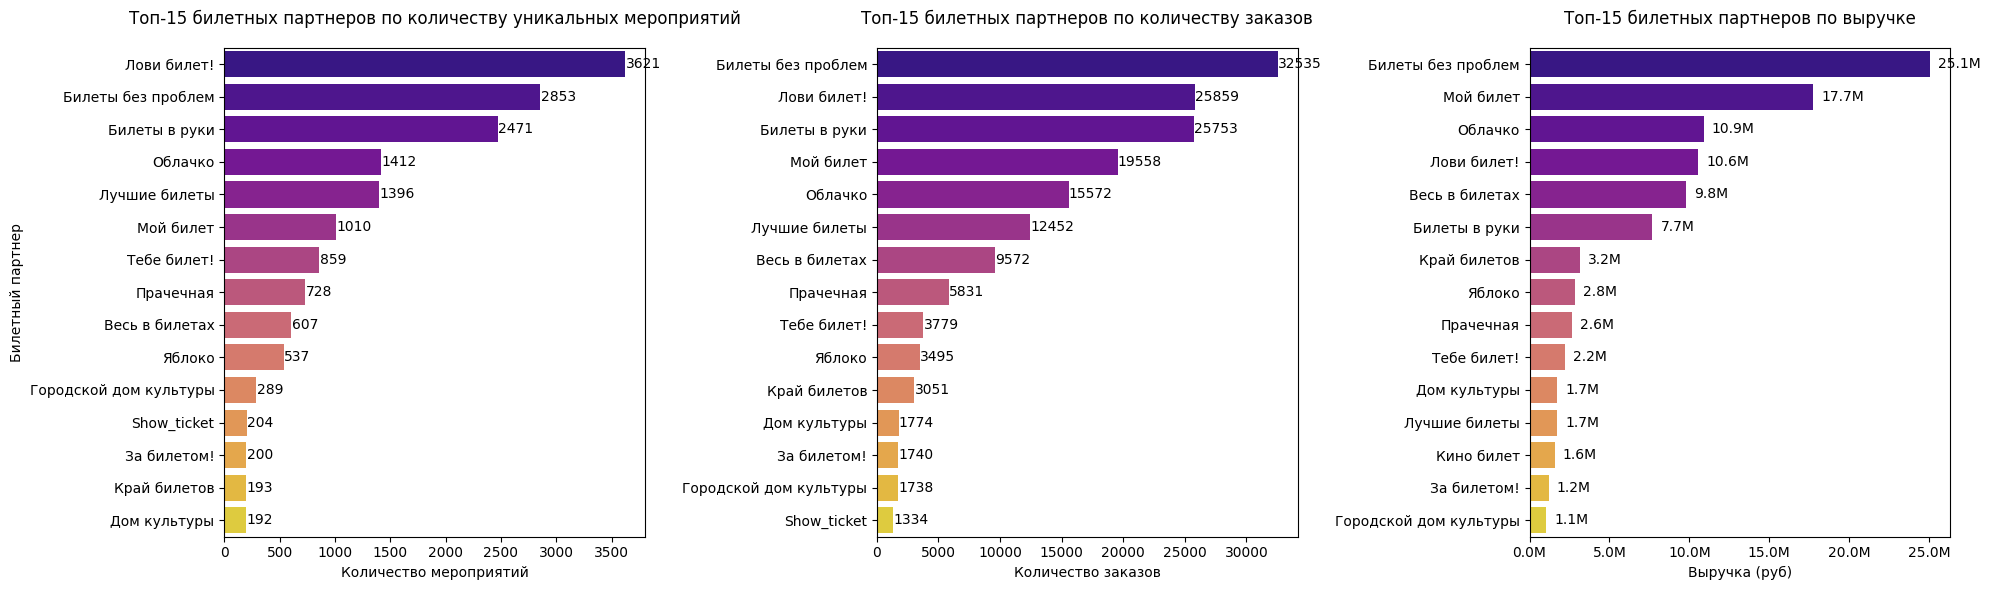

In [69]:
# Создаем фигуру с 3 подграфиками
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Распределение уникальных мероприятий по билетным партнерам (топ-15):
top_services = service_stats.sort_values('unique_events', ascending = False).head(15)
sns.barplot(
    x = 'unique_events', 
    y = top_services.index, 
    data = top_services, 
    ax = axes[0], 
    palette = 'plasma')
axes[0].set_title('Топ-15 билетных партнеров по количеству уникальных мероприятий', pad = 17)
axes[0].set_xlabel('Количество мероприятий')
axes[0].set_ylabel('Билетный партнер')

# Добавление значений на столбцы
for p in axes[0].patches:
    width = p.get_width()
    axes[0].text(width + 5, p.get_y() + p.get_height()/2., 
                f'{int(width)}', 
                ha = 'left', va = 'center')

    
# Распределение заказов по билетным партнерам (топ-15):
top_orders = service_stats.sort_values('total_orders', ascending = False).head(15)
sns.barplot(
    x = 'total_orders',
    y = top_orders.index,
    data = top_orders, 
    ax = axes[1],
    palette = 'plasma')
axes[1].set_title('Топ-15 билетных партнеров по количеству заказов', pad = 17)
axes[1].set_xlabel('Количество заказов')
axes[1].set_ylabel('')

# Добавление значений на столбцы
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 5, p.get_y() + p.get_height()/2., 
                f'{int(width)}', 
                ha = 'left', va = 'center')


# Распределение выручки по билетным партнерам (топ-15):
top_revenue = service_stats.sort_values('total_revenue', ascending = False).head(15)
sns.barplot(
    x = 'total_revenue', 
    y = top_revenue.index, 
    data = top_revenue, 
    ax = axes[2], 
    palette = 'plasma')
axes[2].set_title('Топ-15 билетных партнеров по выручке', pad = 17)
axes[2].set_xlabel('Выручка (руб)')
axes[2].set_ylabel('')

# Форматирование выручки в миллионах
def format_revenue(x, _):
    return f'{x/1e6:.1f}M'
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(format_revenue))

# Добавление значений на столбцы
for p in axes[2].patches:
    width = p.get_width()
    axes[2].text(width + 0.5e6, p.get_y() + p.get_height()/2., 
                f'{width/1e6:.1f}M', 
                ha = 'left', va = 'center')

plt.tight_layout()
plt.show()

#### ВЫВОДЫ:

Анализ по регионам за осенний период показал, что:

- В тройку лидеров по количеству уникальных мероприятий вошли: Каменевский район (3930 м., 24.7% от общего), Североярская область (2620 м., 16.4% от общего) и Широковска область (803 м., 5% от общего). Для остальных регионов данные распределись по убывающей от 764 мероприятий и меньше.


- По количетсву заказов лидеры: Каменевский район (47265 з., 27.9% от общего), Североярская область (20853 з., 12.3% от общего) и Медовская область (12047 з., 7.1% от общего). Для остальных регионов данные распределись по убыващей от 8739 заказов и меньше.


- Что касается выручки, абсолютный лидер - неизменно Каменевский район (31.9 млн руб, 30.4% от общего). Далее, на второе место, вышла Верхоречная область (11.5 млн руб) и замыкает тройку уже знакомая Североярская область (10.9 млн руб, 10.4% от общего). Для остальных регионов данные распределись по убыващей от 7.3 млн руб и меньше.


Анализ наиболее активных билетных партнеров за осенний период показал, что:

- В топ-3 билетных партнера по числу уникальных мероприятий вошли "Лови билет!"(3621 м., 20.9% от общего), "Билеты без проблем"(2853 м., 16.5% от общего) и "Билеты в руки"(2471 м., 14.3% от общего). Для остальных билетных партнеров данные распределись по убывающей от 1412 мероприятий и меньше.


- В категории "количество уникальных заказов" данные распределились следующим образом: "Билеты без проблем"(32533 з., 19.2% от общего), "Лови билет!"(25859 з., 15.3% от общего) и "Билеты в руки"(25749 з., 15.2% от общего). Для остальных билетных партнеров данные распределись по убывающей от 19557 заказов и меньше.


- По выручке лидируют сервисы "Билеты без проблем"(25.1 млн руб, 23.8% от общего), "Мой билет"(17.7 млн руб, 16.9% от общего) и "Облачко"(10.9 млн руб, 10.3% от общего). Для остальных билетных партнеров выручка распределась по убывающей от 10.6 млн рублей и меньше.


**Краткий итог:**

Анализ выявил явное доминирование Каменевского района (24-30% ключевых показателей) и партнера "Билеты без проблем" (16-24% показателей) в осенний период. Распределение остальных участников показывает резкий спад после топ-3, что свидетельствует о высокой концентрации рынка вокруг ограниченного числа лидеров. Это подчеркивает необходимость стратегического партнерства с ключевыми игроками для устойчивого роста бизнеса.

---

## Статистический анализ данных

 Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. Проверим две гипотезы, которые предполагают большую активность пользователей мобильных устройств.

 ### Среднее количество заказов

**Гипотеза**: "Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств."

Для начала изучим сравниваемые данные, что поможет обосновать выбор статистического теста:

In [70]:
# Проверим есть ли пользователи, которые встречются одномременно в группе А и В
group_a = autumn_orders[autumn_orders['device_type_canonical'] == 'mobile']['user_id']
group_b = autumn_orders[autumn_orders['device_type_canonical'] == 'desktop']['user_id']

intersection = list(set(group_a) & set(group_b))
intersects_total = len(intersection)
print(f" Всего обнаружено {intersects_total} пересечений (пользователи, которые встречаются и в контрольной, и в тестовой группе).")

 Всего обнаружено 3259 пересечений (пользователи, которые встречаются и в контрольной, и в тестовой группе).


In [71]:
# Фильтруем DataFrame autumn_orders, оставляя только тех пользователей, которых нет в пересечении
filtered_autumn_orders = autumn_orders[~autumn_orders['user_id'].isin(intersection)]

# Проверяем результат
group_a_filtered = filtered_autumn_orders[filtered_autumn_orders['device_type_canonical'] == 'mobile']['user_id']
group_b_filtered = filtered_autumn_orders[filtered_autumn_orders['device_type_canonical'] == 'desktop']['user_id']

intersection_filtered = set(group_a_filtered) & set(group_b_filtered)
print(f"После фильтрации осталось {len(intersection_filtered)} пересекающихся пользователей")

После фильтрации осталось 0 пересекающихся пользователей


In [72]:
# Считаем кол-во уникальных пользователей для каждой группы
control_group_counter = filtered_autumn_orders[filtered_autumn_orders['device_type_canonical'] == 'mobile']['user_id'].nunique()
test_group_counter = filtered_autumn_orders[filtered_autumn_orders['device_type_canonical'] == 'desktop']['user_id'].nunique()

print(f"Уникальные пользователи в контрольной группе A: {control_group_counter}")
print(f"Уникальные пользователи в тестовой группе B: {test_group_counter}")

# Считаем процентную разницу между группами
p = round(100 * abs(control_group_counter - test_group_counter) / control_group_counter, 2)
print(f"Процентная разница в количестве пользователей в группах A и B: {p}%")

Уникальные пользователи в контрольной группе A: 10936
Уникальные пользователи в тестовой группе B: 1624
Процентная разница в количестве пользователей в группах A и B: 85.15%


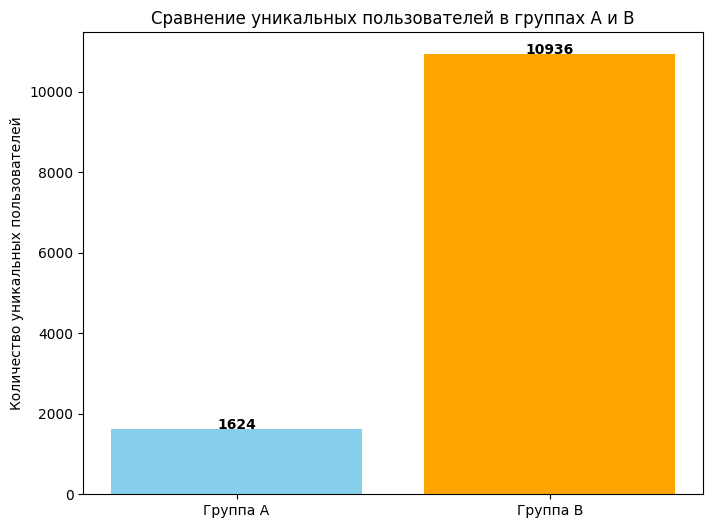

In [73]:
# Количество уникальных пользователей
values = [test_group_counter, control_group_counter]
groups = ['Группа A', 'Группа B']

# Создаем столбчатую диаграмму
plt.figure(figsize=(8, 6))
plt.bar(groups, values, color=['skyblue', 'orange'])
plt.ylabel('Количество уникальных пользователей')
plt.title('Сравнение уникальных пользователей в группах A и B')
plt.xticks(rotation=0)

# Добавляем значения над столбцами
for i, v in enumerate(values):
    plt.text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.show()

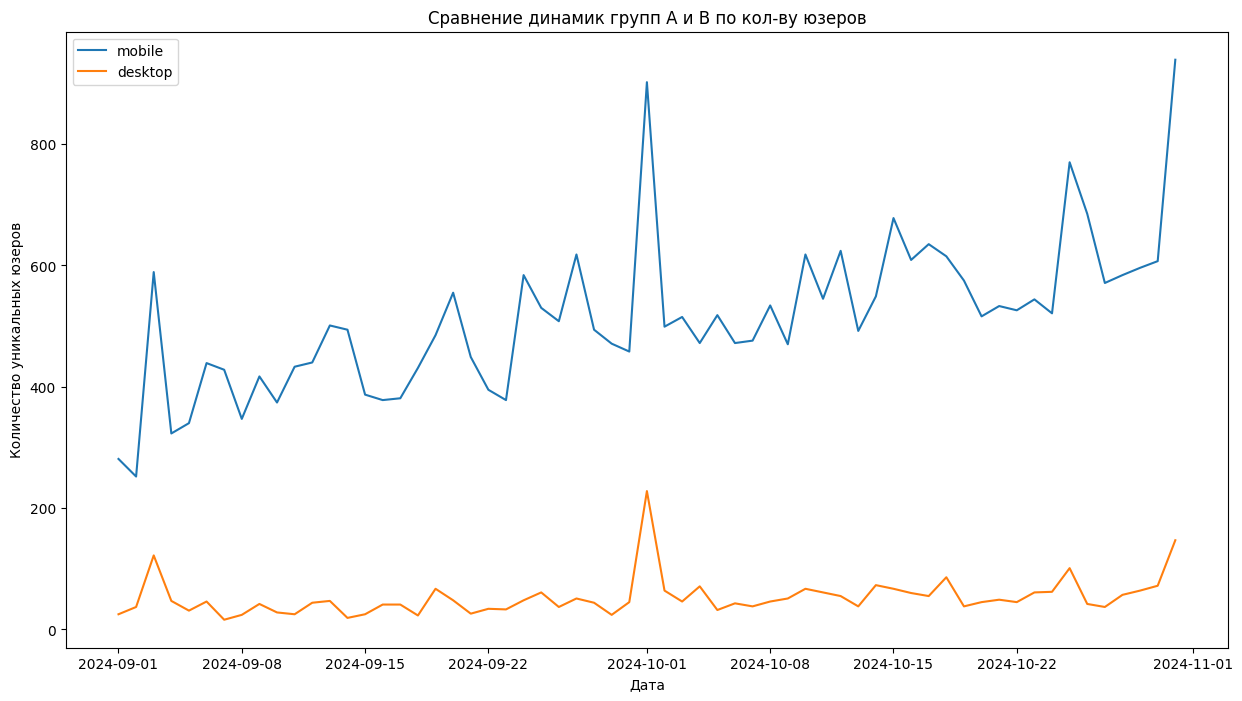

In [74]:
# Сравнение динамики групп эксперимента в период его проведения
df_grp = (
    filtered_autumn_orders
    .groupby(['device_type_canonical', 'created_dt_msk'])
    .agg({
        'order_id':'nunique',
    })
    .reset_index()
)
x = df_grp.created_dt_msk.unique()
y_a = df_grp[df_grp.device_type_canonical=='mobile'].order_id
y_b = df_grp[df_grp.device_type_canonical=='desktop'].order_id

plt.figure(figsize=(15, 8))
plt.plot(x, y_a, label='mobile')
plt.plot(x, y_b, label='desktop')

plt.xlabel("Дата")
plt.ylabel("Количество уникальных юзеров")
plt.legend()
plt.title("Сравнение динамик групп А и В по кол-ву юзеров")
plt.show()

Разница в размерах групп значительная (85.2%), что может повлиять на результаты A/B-теста. Построим boxplot (ящики с усами) для визуализации распределения данных и проверки на выбросы.

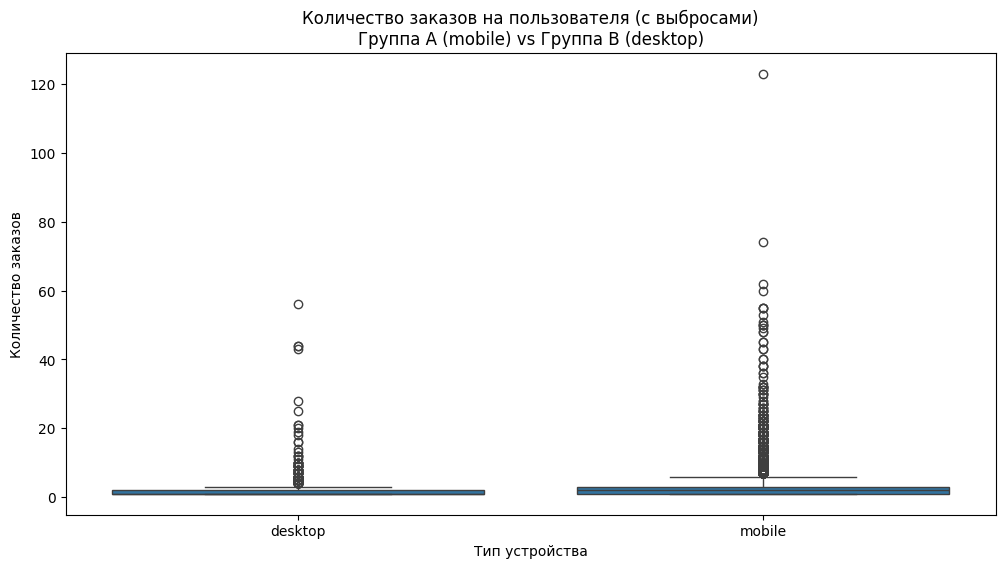

In [75]:
# Подготовка данных - считаем количество заказов на пользователя
orders_per_user = filtered_autumn_orders.groupby(['device_type_canonical', 'user_id']).size().reset_index(name='orders_count')

# Визуализация распределения с выбросами
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=orders_per_user,
    x='device_type_canonical',
    y='orders_count',
    showfliers=True
)
plt.title('Количество заказов на пользователя (с выбросами)\nГруппа A (mobile) vs Группа B (desktop)')
plt.xlabel('Тип устройства')
plt.ylabel('Количество заказов')
plt.show()

In [76]:
# Функция для удаления выбросов
def remove_outliers(df, group_col, value_col):
    clean_data = pd.DataFrame()
    for group in df[group_col].unique():
        group_data = df[df[group_col] == group]
        Q1 = group_data[value_col].quantile(0.25)
        Q3 = group_data[value_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Ограничиваем значения границами
        group_data_clean = group_data[
            (group_data[value_col] >= lower_bound) & 
            (group_data[value_col] <= upper_bound)
        ]
        clean_data = pd.concat([clean_data, group_data_clean])
    return clean_data

# Удаляем выбросы
clean_orders = remove_outliers(orders_per_user, 'device_type_canonical', 'orders_count')

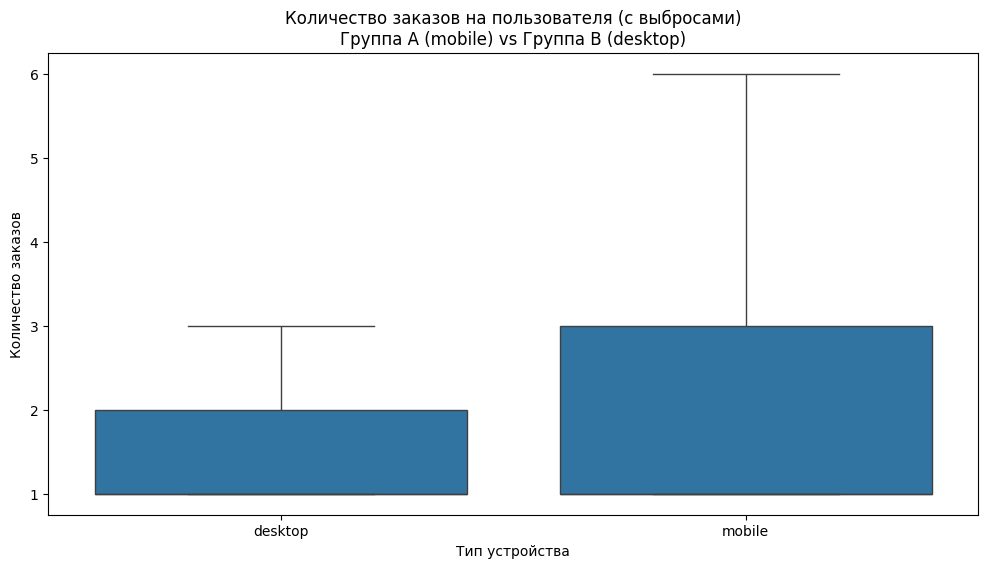

In [77]:
# Визуализация распределения без выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=clean_orders,
    x='device_type_canonical',
    y='orders_count',
    showfliers=True
)
plt.title('Количество заказов на пользователя (с выбросами)\nГруппа A (mobile) vs Группа B (desktop)')
plt.xlabel('Тип устройства')
plt.ylabel('Количество заказов')
plt.show()

In [78]:
# Описательная статистика
print("Описательная статистика по группам:")
print(clean_orders.groupby('device_type_canonical')['orders_count'].describe())

Описательная статистика по группам:
                        count      mean       std  min  25%  50%  75%  max
device_type_canonical                                                     
desktop                1475.0  1.385763  0.652467  1.0  1.0  1.0  2.0  3.0
mobile                 9985.0  1.957837  1.336407  1.0  1.0  1.0  3.0  6.0


Так как была произведена фильтрация, используем **ttest**.

**Формулировка гипотез**
- Нулевая гипотеза (H₀): 
  *Среднее количество заказов в мобильной группе НЕ выше, чем в десктопной.*  
  Формально:  
  $$
  H_0: \mu_{\text{mobile}} <= \mu_{\text{desktop}}
  $$

- Альтернативная гипотеза (H₁):  
  *Среднее количество заказов в мобильной группе выше, чем в десктопной*  
  Формально:  
  $$
  H_1: \mu_{\text{mobile}} > \mu_{\text{desktop}}, 
  $$
  
Где:
- $\mu_{\text{mobile}}$ - среднее количество заказов в мобильной группе
- $\mu_{\text{desktop}}$ - среднее количество заказов в десктопной группе  

In [79]:
# Разделяем данные на группы
mobile_orders = clean_orders[clean_orders['device_type_canonical'] == 'mobile']['orders_count']
desktop_orders = clean_orders[clean_orders['device_type_canonical'] == 'desktop']['orders_count']

# Проверяем равенство дисперсий
levene_test = stats.levene(mobile_orders, desktop_orders)
print(f"\nТест Левене на равенство дисперсий: p-value = {levene_test.pvalue:.4f}")


Тест Левене на равенство дисперсий: p-value = 0.0000


In [80]:
# Выбираем тест в зависимости от равенства дисперсий
alpha = 0.05
if levene_test.pvalue > alpha:
    # Если дисперсии равны - используем обычный t-тест
    t_stat, p_value = stats.ttest_ind(mobile_orders, desktop_orders, equal_var=True)
    test_name = "t-тест (равные дисперсии)"
else:
    # Если дисперсии не равны - используем t-тест с поправкой Уэлча
    t_stat, p_value = stats.ttest_ind(mobile_orders, desktop_orders, equal_var=False)
    test_name = "t-тест с поправкой Уэлча (неравные дисперсии)"

# Для одностороннего теста делим p-value на 2
p_value_one_sided = p_value / 2

print(f"\nРезультат {test_name}:")
print(f"t-статистика = {t_stat:.3f}, p-value (односторонний) = {p_value_one_sided:.4f}")

if p_value_one_sided < alpha:
    print(f"\nВывод: Есть основания отвергнуть нулевую гипотезу (p < {alpha}).")
    print("Среднее количество заказов в мобильной группе значимо выше.")
else:
    print(f"\nВывод: Нет оснований отвергнуть нулевую гипотезу (p ≥ {alpha}).")
    print("Статистически значимых различий не обнаружено.")


Результат t-тест с поправкой Уэлча (неравные дисперсии):
t-статистика = 26.459, p-value (односторонний) = 0.0000

Вывод: Есть основания отвергнуть нулевую гипотезу (p < 0.05).
Среднее количество заказов в мобильной группе значимо выше.


---

### Среднее время между заказами

**Гипотеза**: "Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств."

Для начала изучим сравниваемые данные, что поможет обосновать выбор статистического теста:

In [81]:
# Удаляем пользователей, которые есть в обеих группах 
mobile_users = autumn_orders[autumn_orders['device_type_canonical'] == 'mobile']['user_id'].unique()
desktop_users = autumn_orders[autumn_orders['device_type_canonical'] == 'desktop']['user_id'].unique()

# Оставляем только уникальных пользователей в каждой группе
filtered_autumn_orders = autumn_orders[
    ((autumn_orders['device_type_canonical'] == 'mobile') & (autumn_orders['user_id'].isin(mobile_users))) |
    ((autumn_orders['device_type_canonical'] == 'desktop') & (autumn_orders['user_id'].isin(desktop_users)))
].copy()

In [82]:
# Удаляем строки с пропусками в столбце days_since_prev
filtered_autumn_orders_clean = filtered_autumn_orders.dropna(subset=['days_since_prev'])

# Проверяем результат
print(f"Было строк: {len(filtered_autumn_orders)}")
print(f"Стало строк после удаления NaN: {len(filtered_autumn_orders_clean)}")
print(f"Удалено строк: {len(filtered_autumn_orders) - len(filtered_autumn_orders_clean)}")

# Проверяем, что пропусков больше нет
print("\nПроверка оставшихся пропусков в days_since_prev:")
print(filtered_autumn_orders_clean['days_since_prev'].isna().sum())

Было строк: 169569
Стало строк после удаления NaN: 161209
Удалено строк: 8360

Проверка оставшихся пропусков в days_since_prev:
0


In [83]:
print("Описательная статистика времени между заказами (дни):")
print(filtered_autumn_orders_clean.groupby('device_type_canonical')['days_since_prev'].describe())

Описательная статистика времени между заказами (дни):
                          count      mean        std  min  25%  50%  75%  \
device_type_canonical                                                      
desktop                 33186.0  3.022720  12.081591  0.0  0.0  0.0  1.0   
mobile                 128023.0  3.778805  13.376669  0.0  0.0  0.0  1.0   

                         max  
device_type_canonical         
desktop                146.0  
mobile                 148.0  


В силу наличия выбросов используем тест **Манна-Уитни.**

**Формулировка гипотез**
- Нулевая гипотеза (H₀):  
  *Среднее время между заказами у мобильных пользователей равно десктопным.*  
  Формально:  
  $$
  H_0: \text{median}_{\text{mobile}} = \text{median}_{\text{desktop}}
  $$

- Альтернативная гипотеза (H₁):  
  *Среднее время между заказами у мобильных пользователей больше, чем у десктопных.*  
  Формально:  
  $$
  H_1: \text{median}_{\text{mobile}} > \text{median}_{\text{desktop}}
  $$

In [84]:
# Разделяем данные на группы
desktop_times = filtered_autumn_orders_clean[filtered_autumn_orders_clean['device_type_canonical'] == 'desktop']['days_since_prev']
mobile_times = filtered_autumn_orders_clean[filtered_autumn_orders_clean['device_type_canonical'] == 'mobile']['days_since_prev']

# Применяем U-тест Манна-Уитни с альтернативой "greater" (H₁: mobile > desktop)
alpha = 0.05
stat, p_value = stats.mannwhitneyu(mobile_times, desktop_times, alternative='greater')

print(f"\nРезультат U-теста Манна-Уитни:")
print(f"Статистика = {stat:.1f}, p-value = {p_value:.4f}")

# Интерпретация
if p_value < alpha:
    print(f"Есть основания отвергнуть нулевую гипотезу.\nВывод: время между заказами в мобильной группе значимо выше (p < {alpha})")
else:
    print(f"Нет оснований отвергнуть нулевую гипотезу.\nВывод: статистически значимых различий нет (p ≥ {alpha}).")


Результат U-теста Манна-Уитни:
Статистика = 2250014566.0, p-value = 0.0000
Есть основания отвергнуть нулевую гипотезу.
Вывод: время между заказами в мобильной группе значимо выше (p < 0.05)


### Выводы по результатам A/B - экспериментов:

1. **Гипотеза о среднем количестве заказов на пользователя**
- Результат:  
  - Статистический анализ показал, что среднее количество заказов в мобильной группе значимо выше, чем в десктопной (p-value < 0.05).  

- Ключевые метрики:  
   - Тест Левене: p-value = 0.0000 → дисперсии неравны (использован t-тест с поправкой Уэлча).  
   - t-статистика (Уэлч): 26.459  
   - p-value (односторонний): 0.0000 → статистическая значимость различий.  

- Интерпретация:  
   - Гипотеза о том, что мобильная группа не превосходит десктопную (**H₀: μ_mobile ≤ μ_desktop**), отвергается.  
   - Альтернативная гипотеза (H₁: μ_mobile > μ_desktop) подтверждается – мобильные пользователи совершают больше заказов.  

- Рекомендации:  
   - Усилить мобильный трафик, так как он демонстрирует более высокую конверсию в заказы.  
   - Оптимизировать десктопную версию (например, улучшить UX, ускорить загрузку), чтобы сократить разрыв.  
   - Дополнительно изучить причины различий (например, удобство интерфейса, скорость работы приложения).  

2. **Гипотеза о среднем среднем времени между заказами пользователя**
- Результат:
   - Результаты U-теста Манна-Уитни (p-value ≈ 0.0000) позволяют уверенно отвергнуть нулевую гипотезу.
   - Подтверждается, что время между заказами у мобильных пользователей действительно больше, чем у десктопных.
   - Медианное время между заказами в обеих группах составляет 0 дней, что указывает на высокую частоту повторных заказов в короткий срок.
   - Однако средние значения различаются: 3.78 дня (мобильные) против 3.02 дня (десктопные).
   - Более высокое стандартное отклонение у мобильных пользователей (13.38 против 12.08) свидетельствует о большей вариативности их поведения.

- Интерпретация:
   - Десктопные пользователи демонстрируют более регулярные покупки с меньшими интервалами.
   - Мобильные пользователи делают заказы реже, но с большими промежутками времени между ними.
   - Максимальные значения (146-148 дней) показывают наличие "спящих" пользователей в обеих группах.

- Рекомендации:
   - Для мобильных пользователей: разработать стратегию повторного вовлечения через push-уведомления или персональные предложения.
   - Для десктопных пользователей: рассмотреть программы лояльности для поощрения частых покупок.
   
Выводы основаны на статистически значимых результатах и могут быть использованы для оптимизации маркетинговых стратегий для разных платформ.

---

## Общий вывод и рекомендации

**1. Информация о данных** 
Исследование проведено на данных Яндекс Афиши за период с июня по ноябрь 2024 года:  
- Заказы: 284 515 записей после очистки (изначально 290 849).  
- Мероприятия: 22 427 событий в 25+ регионах.  
- Курсы валют: конвертация тенге в рубли по актуальным курсам.  


**2. Ключевые результаты**
2.1. Динамика спроса  
- Рост заказов: Увеличение с 32,7 тыс. в июне до 99,9 тыс. в ноябре (+206%).  
- Сезонные изменения:  
  - Лето: доминируют концерты (40% заказов), осенью рост интереса к театру (с 20% до 25%) и спорту (с 2,5% до 11%).  
  - Падение спроса на категорию "другое" (с 27,5% до 19,6%).  

2.2. Ценовая политика  
- Средний чек:  
  - Летние концерты — 919 руб., осенью — 346 руб. (-62%).  
  - Рост цен на категорию "другое" (+29,8%).  

2.3. Активность пользователей  
- Пики спроса: 1 октября (7 тыс. заказов) и 31 октября (1,3 тыс. DAU) — корреляция с низкими ценами.  
- Недельная цикличность: Максимум заказов по вторникам (30+ тыс.), минимум — в воскресенье.  

2.4. Регионы и партнеры  
- ТОП-3 региона: Каменевский район (30% выручки), Североярская и Верхоречная области.  
- ТОП-3 партнера: "Билеты без проблем" (24% выручки), "Лови билет!", "Мой билет".

2.5. Различия платформ  
- Мобильные пользователи:  
  - Совершают на 41% больше заказов (1.96 vs 1.39).  
  - Делают заказы реже (3,8 дня vs 3,0 дня у десктопа), но с бóльшими чеками.  


**3. Проверка гипотез**
- Гипотеза 1: Мобильные пользователи заказывают чаще — подтверждена ( p-value = 0.000 ).  
- Гипотеза 2: Время между заказами у мобильных пользователей больше — подтверждена (p-value ≈ 0).  


**4. Рекомендации**
1. Сезонные акции:  
   - Осенью усиливать продвижение театральных и спортивных мероприятий.  
   - Для концертов — тестировать гибкое ценообразование (скидки в низкий сезон).  

2. Работа с платформами:  
   - Для мобильных пользователей: персонализированные push-уведомления для снижения интервала между заказами.  
   - Для десктопа: программы лояльности (бонусы за частые покупки).  

3. Партнерская стратегия:  
   - Укреплять сотрудничество с лидерами ("Билеты без проблем", "Лови билет!").  
   - Развивать регионы-аутсайдеры через локальные мероприятия.  

4. Аналитика:   
   - Мониторить DAU и средний чек в дни с аномальными ценами (например, 1 октября).  

Итог: Осенний сезон показал смещение спроса в сторону театра и спорта, при сохранении доминирования мобильных заказов. Оптимизация цен и партнерских стратегий поможет максимизировать выручку в 2025 году.  

---  